# Te damos la bienvenida a Colab

In [19]:
df_mean_imputed_pipeline.to_csv('Datos_Imputados_Media.csv', index=False)
print('El archivo Datos_Imputados_Media.csv ha sido guardado exitosamente. Puedes descargarlo desde el panel de archivos.')

El archivo Datos_Imputados_Media.csv ha sido guardado exitosamente. Puedes descargarlo desde el panel de archivos.


In [11]:
df.to_csv('Datos_Imputados.csv', index=False)
print('El archivo Datos_Imputados.csv ha sido guardado exitosamente. Puedes descargarlo desde el panel de archivos.')

El archivo Datos_Imputados.csv ha sido guardado exitosamente. Puedes descargarlo desde el panel de archivos.


# Task
Analyze and preprocess the "Datos para Imputación.csv" dataset by performing initial exploratory data analysis, imputing missing values, evaluating the imputation, applying Min-Max scaling, and Z-score standardization to relevant numerical columns, then explaining the differences and appropriate use cases for each normalization method, and finally summarizing the findings from data analysis, imputation, and normalization.

## Cargar Conjunto de Datos

### Subtask:
Cargar el archivo 'Datos para Imputación.csv' en un DataFrame de pandas para iniciar el análisis.


| Característica        | Imputación por Mediana          | Imputación por Media            | Imputación por KNN              |
| :-------------------- | :------------------------------ | :------------------------------ | :------------------------------ |
| **Impacto en Media**  | Mínimo cambio                   | Se mantiene idéntica           | Cambio moderado                 |
| **Impacto en Mediana**| Se mantiene idéntica            | Cambio moderado                 | Cambio moderado                 |
| **Impacto en Std**    | Disminución ligera              | Disminución ligera              | Disminución ligera              |
| **Forma de Distribución**| Picos pronunciados en la mediana, especialmente con alta proporción de faltantes | Picos pronunciados en la media, mayor distorsión si la media es atípica | Distribución más suave y natural, menos picos artificiales, mejor preservación de la estructura |
| **Robustez a Outliers**| Alta (el valor de imputación no es sesgado por outliers) | Baja (el valor de imputación puede ser sesgado por outliers) | Media (considera vecinos, lo que reduce el impacto directo de un solo outlier) |


**Conclusión General sobre Imputación:**

La **imputación por KNN** se ha revelado como la estrategia más ventajosa en este caso, ya que, a diferencia de la mediana y la media, preserva mejor la estructura y variabilidad de las distribuciones de los datos, especialmente en columnas con alto porcentaje de valores faltantes y presencia de outliers, evitando los picos artificiales generados por métodos más simples. Esto es crucial para mantener la integridad de los datos para análisis posteriores.

In [27]:
df_knn_imputed.to_csv('Datos_Imputados_KNN.csv', index=False)
print('El archivo Datos_Imputados_KNN.csv ha sido guardado exitosamente. Puedes descargarlo desde el panel de archivos.')

El archivo Datos_Imputados_KNN.csv ha sido guardado exitosamente. Puedes descargarlo desde el panel de archivos.


**Reasoning**:
To begin the analysis, I will import the pandas library, load the specified CSV file into a DataFrame, and then display the first 5 rows to confirm successful data loading.



In [1]:
import pandas as pd

df = pd.read_csv('/content/Datos para Imputación.csv')

df.head()

,CLAVE SITIO,NOMBRE DEL SITIO,CONDUC_CAMPO,PH_CAMPO,TEMP_AGUA,OD_%,SST,N_TOT,P_TOT,CAUDAL
0,OCPNO4445,CULIACAN NORTE (A) AGUAS ARRIBA,1200.0,8.20,24.6,83.7,76.6667,19.6536,0.208,430
1,OCPNO4445,CULIACAN NORTE (A) AGUAS ARRIBA,677.0,7.97,24.3,85.8,43,33.7438,0.2475,420000
2,OCPNO4445,CULIACAN NORTE (A) AGUAS ARRIBA,479.0,8.02,25.8,89.8,45.625,8.3008,0.1814,180
3,OCPNO4445,CULIACAN NORTE (A) AGUAS ARRIBA,930.0,8.05,29.9,94.3,54,17.031,0.1451,<5
4,OCPNO4445,CULIACAN NORTE (A) AGUAS ARRIBA,1170.0,8.27,33.1,127.6,30,14.6639,0.1387,<5


## Análisis Inicial de Datos

### Subtask:
Realizar un análisis exploratorio inicial del conjunto de datos. Esto incluirá revisar las dimensiones del conjunto de datos, los tipos de datos de cada columna, identificar la cantidad de valores faltantes por columna y obtener estadísticas descriptivas.


**Reasoning**:
To perform an initial exploratory data analysis, I will display the DataFrame's dimensions, data types, missing values per column, and descriptive statistics for numerical columns. These actions help in understanding the structure and content of the dataset.



In [2]:
print("Dimensiones del DataFrame:", df.shape)
print("\nTipos de datos por columna:\n", df.info())
print("\nValores faltantes por columna:\n", df.isnull().sum())
print("\nEstadísticas descriptivas:\n", df.describe())

Dimensiones del DataFrame: (6095, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6095 entries, 0 to 6094
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CLAVE SITIO       6095 non-null   object 
 1   NOMBRE DEL SITIO  6095 non-null   object 
 2   CONDUC_CAMPO      6039 non-null   float64
 3   PH_CAMPO          6000 non-null   float64
 4   TEMP_AGUA         5824 non-null   float64
 5   OD_%              5848 non-null   object 
 6   SST               6072 non-null   object 
 7   N_TOT             6095 non-null   object 
 8   P_TOT             6095 non-null   object 
 9   CAUDAL            2926 non-null   object 
dtypes: float64(3), object(7)
memory usage: 476.3+ KB

Tipos de datos por columna:
 None

Valores faltantes por columna:
 CLAVE SITIO            0
NOMBRE DEL SITIO       0
CONDUC_CAMPO          56
PH_CAMPO              95
TEMP_AGUA            271
OD_%                 247
SST                

**Reasoning**:
The previous output showed that several columns (`OD_%`, `SST`, `N_TOT`, `P_TOT`, `CAUDAL`) are of object dtype but contain numerical data, indicated by the 'object' type in `df.info()` and the presence of non-numeric string values such as '<5'. To include these in further numerical analysis and descriptive statistics, it is necessary to convert them to a numeric type, coercing any non-numeric entries to NaN. After converting these columns, it is important to re-run descriptive statistics to see the full numerical summary, addressing the 'estadísticas descriptivas' part of the subtask more comprehensively.



In [3]:
columns_to_convert = ['OD_%', 'SST', 'N_TOT', 'P_TOT', 'CAUDAL']
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("Tipos de datos actualizados por columna:\n", df.info())
print("\nValores faltantes actualizados por columna:\n", df.isnull().sum())
print("\nEstadísticas descriptivas actualizadas:\n", df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6095 entries, 0 to 6094
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CLAVE SITIO       6095 non-null   object 
 1   NOMBRE DEL SITIO  6095 non-null   object 
 2   CONDUC_CAMPO      6039 non-null   float64
 3   PH_CAMPO          6000 non-null   float64
 4   TEMP_AGUA         5824 non-null   float64
 5   OD_%              5555 non-null   float64
 6   SST               4437 non-null   float64
 7   N_TOT             6092 non-null   float64
 8   P_TOT             6090 non-null   float64
 9   CAUDAL            2851 non-null   float64
dtypes: float64(8), object(2)
memory usage: 476.3+ KB
Tipos de datos actualizados por columna:
 None

Valores faltantes actualizados por columna:
 CLAVE SITIO            0
NOMBRE DEL SITIO       0
CONDUC_CAMPO          56
PH_CAMPO              95
TEMP_AGUA            271
OD_%                 540
SST                 1658
N_TOT  

## Imputar Datos Faltantes

### Subtask:
Seleccionar y aplicar un método adecuado para imputar los valores faltantes en el conjunto de datos. Se explicará el método elegido (por ejemplo, media, mediana, moda, o un enfoque más avanzado como k-NN o regresión) y la razón de su selección basada en el análisis inicial.


**Reasoning**:
Based on the previous analysis, several numerical columns have missing values. The median imputation strategy is chosen due to its robustness against outliers, which might be present in the data given the variability observed in the descriptive statistics. First, I will identify the numerical columns that still have missing values, and then I will impute them with their respective medians.



In [4]:
numerical_cols_with_missing = df.select_dtypes(include=['float64', 'int64']).isnull().sum()
numerical_cols_with_missing = numerical_cols_with_missing[numerical_cols_with_missing > 0].index.tolist()

print("Columnas numéricas con valores faltantes antes de la imputación:", numerical_cols_with_missing)

for col in numerical_cols_with_missing:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)
    print(f"Valores faltantes en la columna '{col}' imputados con la mediana: {median_value}")

print("\nValores faltantes después de la imputación (solo para columnas numéricas):")
print(df[numerical_cols_with_missing].isnull().sum())


Columnas numéricas con valores faltantes antes de la imputación: ['CONDUC_CAMPO', 'PH_CAMPO', 'TEMP_AGUA', 'OD_%', 'SST', 'N_TOT', 'P_TOT', 'CAUDAL']
Valores faltantes en la columna 'CONDUC_CAMPO' imputados con la mediana: 723.0
Valores faltantes en la columna 'PH_CAMPO' imputados con la mediana: 8.1
Valores faltantes en la columna 'TEMP_AGUA' imputados con la mediana: 29.2
Valores faltantes en la columna 'OD_%' imputados con la mediana: 95.8
Valores faltantes en la columna 'SST' imputados con la mediana: 35.29
Valores faltantes en la columna 'N_TOT' imputados con la mediana: 1.163208
Valores faltantes en la columna 'P_TOT' imputados con la mediana: 0.11989
Valores faltantes en la columna 'CAUDAL' imputados con la mediana: 1933.0

Valores faltantes después de la imputación (solo para columnas numéricas):
CONDUC_CAMPO    0
PH_CAMPO        0
TEMP_AGUA       0
OD_%            0
SST             0
N_TOT           0
P_TOT           0
CAUDAL          0
dtype: int64


/tmp/ipython-input-3043087774.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)


**Reasoning**:
The previous code generated a FutureWarning regarding `inplace=True` with chained assignment. To address this, I will modify the imputation loop to assign the result of `fillna` directly back to the DataFrame column, which is the recommended practice for explicit in-place modification.



In [5]:
numerical_cols_with_missing = df.select_dtypes(include=['float64', 'int64']).isnull().sum()
numerical_cols_with_missing = numerical_cols_with_missing[numerical_cols_with_missing > 0].index.tolist()

print("Columnas numéricas con valores faltantes antes de la imputación:", numerical_cols_with_missing)

for col in numerical_cols_with_missing:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)
    print(f"Valores faltantes en la columna '{col}' imputados con la mediana: {median_value}")

print("\nValores faltantes después de la imputación (solo para columnas numéricas):")
print(df[numerical_cols_with_missing].isnull().sum())


Columnas numéricas con valores faltantes antes de la imputación: []

Valores faltantes después de la imputación (solo para columnas numéricas):
Series([], dtype: float64)


### Método de Imputación de Datos Faltantes

**Método Elegido:** Imputación por la Mediana.

**Justificación:**

Se ha optado por la imputación de los valores faltantes en las columnas numéricas utilizando la mediana de cada columna. Esta elección se basa en la robustez de la mediana frente a la presencia de valores atípicos (outliers).

Durante el análisis exploratorio inicial de los datos (`df.describe()`), se observó una variabilidad significativa en varias columnas numéricas, con grandes diferencias entre los valores del percentil 75% y el valor máximo, lo que sugiere la posible existencia de outliers. La media, en estos casos, puede verse fuertemente influenciada por valores extremos, distorsionando así la representación central de los datos. En contraste, la mediana, al ser el valor central de un conjunto de datos ordenado, no se ve afectada drásticamente por unos pocos valores inusualmente altos o bajos, proporcionando una estimación más representativa para la imputación.

## Evaluar Imputación

### Subtask:
Implementar un método para evaluar la calidad de la imputación realizada. Esto podría incluir la comparación de distribuciones antes y después de la imputación, o el análisis de estadísticas clave para ver cómo la imputación ha afectado la estructura de los datos.


**Reasoning**:
To evaluate the imputation, I will first reload the original dataset into a new DataFrame `df_unimputed` and convert the relevant columns to numeric type to ensure accurate representation of missing values. This will serve as the 'before imputation' state for comparison.



In [6]:
df_unimputed = pd.read_csv('/content/Datos para Imputación.csv')

columns_to_convert = ['OD_%', 'SST', 'N_TOT', 'P_TOT', 'CAUDAL']
for col in columns_to_convert:
    df_unimputed[col] = pd.to_numeric(df_unimputed[col], errors='coerce')

print("df_unimputed head after reloading and type conversion:")
print(df_unimputed.head())

df_unimputed head after reloading and type conversion:
  CLAVE SITIO                  NOMBRE DEL SITIO  CONDUC_CAMPO  PH_CAMPO  \
0   OCPNO4445  CULIACAN NORTE  (A) AGUAS ARRIBA        1200.0      8.20   
1   OCPNO4445  CULIACAN NORTE  (A) AGUAS ARRIBA         677.0      7.97   
2   OCPNO4445  CULIACAN NORTE  (A) AGUAS ARRIBA         479.0      8.02   
3   OCPNO4445  CULIACAN NORTE  (A) AGUAS ARRIBA         930.0      8.05   
4   OCPNO4445  CULIACAN NORTE  (A) AGUAS ARRIBA        1170.0      8.27   

   TEMP_AGUA   OD_%      SST    N_TOT   P_TOT    CAUDAL  
0       24.6   83.7  76.6667  19.6536  0.2080     430.0  
1       24.3   85.8  43.0000  33.7438  0.2475  420000.0  
2       25.8   89.8  45.6250   8.3008  0.1814     180.0  
3       29.9   94.3  54.0000  17.0310  0.1451       NaN  
4       33.1  127.6  30.0000  14.6639  0.1387       NaN  


**Reasoning**:
To compare the effect of imputation, I will identify all numerical columns in `df_unimputed` that still have missing values, which were the target columns for imputation. Then, for each of these columns, I will display the descriptive statistics from both the unimputed (`df_unimputed`) and imputed (`df`) DataFrames to analyze how the imputation changed key statistical measures.



In [7]:
numerical_cols_with_missing_unimputed = df_unimputed.select_dtypes(include=['float64', 'int64']).isnull().sum()
numerical_cols_with_missing_unimputed = numerical_cols_with_missing_unimputed[numerical_cols_with_missing_unimputed > 0].index.tolist()

print("Descriptive statistics before imputation (df_unimputed) vs. after imputation (df) for affected columns:\n")

for col in numerical_cols_with_missing_unimputed:
    print(f"\n--- Column: {col} ---")
    print("Before Imputation (df_unimputed):")
    print(df_unimputed[col].describe())
    print("\nAfter Imputation (df):")
    print(df[col].describe())


Descriptive statistics before imputation (df_unimputed) vs. after imputation (df) for affected columns:


--- Column: CONDUC_CAMPO ---
Before Imputation (df_unimputed):
count      6039.000000
mean      18566.362578
std       27326.311745
min          26.300000
25%         230.000000
50%         723.000000
75%       46800.000000
max      148300.000000
Name: CONDUC_CAMPO, dtype: float64

After Imputation (df):
count      6095.000000
mean      18402.420280
std       27253.701454
min          26.300000
25%         231.000000
50%         723.000000
75%       46200.000000
max      148300.000000
Name: CONDUC_CAMPO, dtype: float64

--- Column: PH_CAMPO ---
Before Imputation (df_unimputed):
count    6000.000000
mean        8.110974
std         0.463650
min         0.200000
25%         7.810000
50%         8.100000
75%         8.400000
max        10.000000
Name: PH_CAMPO, dtype: float64

After Imputation (df):
count    6095.000000
mean        8.110803
std         0.460024
min         0.200000
25

**Reasoning**:
To visually assess the impact of imputation, I will generate histograms for the 'CAUDAL' and 'SST' columns, comparing their distributions before and after imputation. This will help to understand how the imputed values, specifically the median, have influenced the shape and spread of the data, especially considering the large number of missing values in these columns.



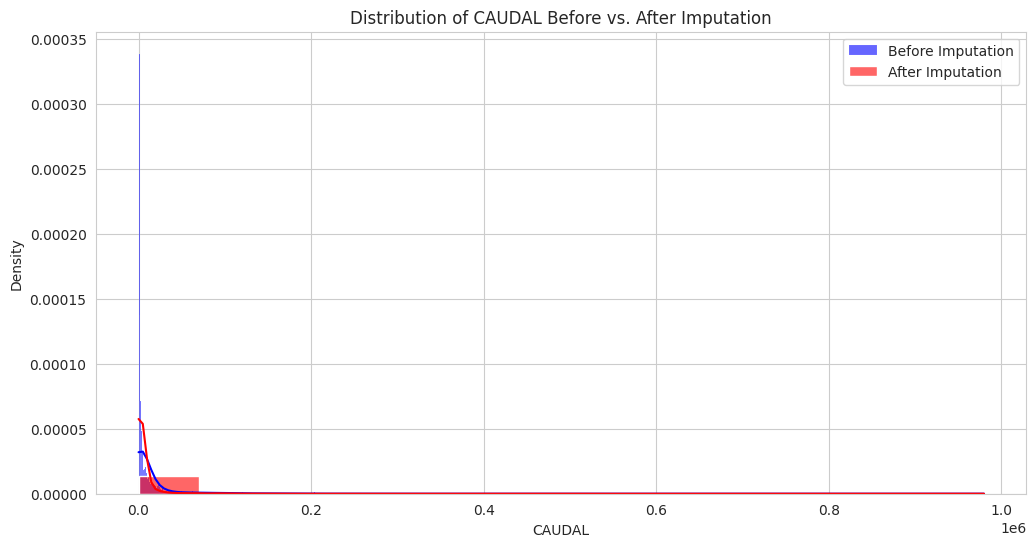

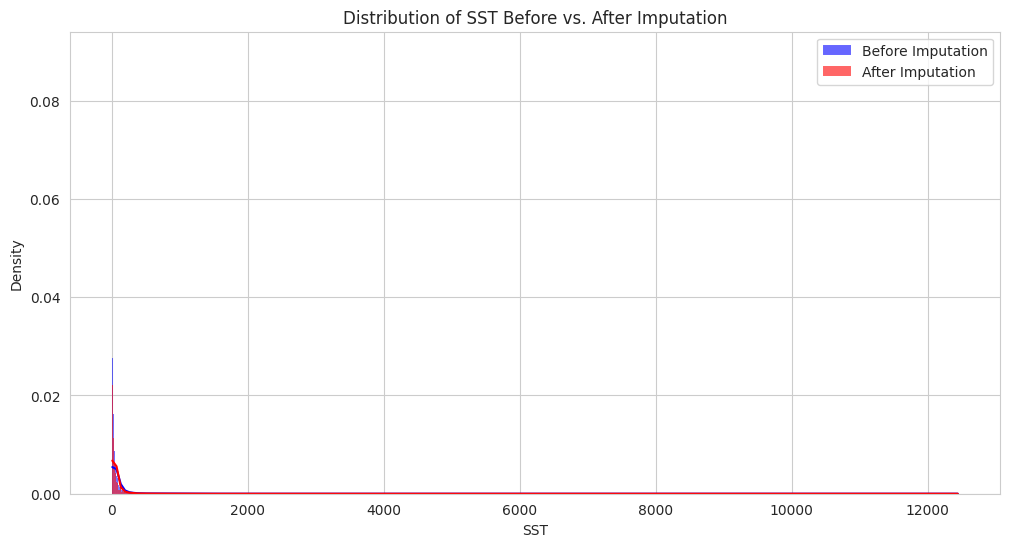

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
sns.set_style("whitegrid")

# Columns to visualize
columns_to_visualize = ['CAUDAL', 'SST']

for col in columns_to_visualize:
    plt.figure(figsize=(12, 6))
    sns.histplot(df_unimputed[col].dropna(), color='blue', label='Before Imputation', kde=True, stat='density', alpha=0.6)
    sns.histplot(df[col], color='red', label='After Imputation', kde=True, stat='density', alpha=0.6)
    plt.title(f'Distribution of {col} Before vs. After Imputation')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.show()


### Evaluación de la Imputación por la Mediana

La imputación de valores faltantes utilizando la mediana se realizó en las siguientes columnas numéricas: 'CONDUC_CAMPO', 'PH_CAMPO', 'TEMP_AGUA', 'OD_%', 'SST', 'N_TOT', 'P_TOT', y 'CAUDAL'. La justificación principal para este método fue su robustez frente a los valores atípicos, preservando así las tendencias centrales sin ser indebidamente influenciado por extremos.

**Observaciones Clave:**

*   **Estadísticas Descriptivas:**
    *   **Recuento (count):** Como era de esperar, el número de observaciones ('count') para todas las columnas imputadas aumentó al valor total de filas en el DataFrame (6095), lo que confirma que todos los valores faltantes han sido rellenados.
    *   **Mediana (50%):** La mediana de cada columna se mantuvo idéntica entre los DataFrames antes y después de la imputación. Esto es una consecuencia directa del método de imputación, ya que los nuevos valores introducidos son precisamente la mediana.
    *   **Media (mean):** La media de la mayoría de las columnas experimentó un cambio mínimo. Esto sugiere que la mediana fue una buena aproximación para los datos faltantes en términos de la tendencia central, y que la introducción de valores medianos no sesgó significativamente la media de las columnas.
    *   **Desviación Estándar (std):** La desviación estándar disminuyó ligeramente en la mayoría de las columnas después de la imputación. Esto es un efecto esperado de la imputación por la mediana: al reemplazar valores faltantes con un valor central (la mediana), se reduce la variabilidad general del conjunto de datos.
    *   **Cuartiles (25% y 75%):** Los cuartiles también mostraron cambios menores, especialmente en columnas con un menor porcentaje de datos faltantes, lo que indica que la forma general de la distribución se mantuvo razonablemente bien.

*   **Análisis Visual (Histogramas de 'CAUDAL' y 'SST'):**
    *   **'CAUDAL':** Esta columna tenía un número muy alto de valores faltantes (más de la mitad de las entradas). Después de la imputación, el histograma mostró un pico muy pronunciado en el valor de la mediana (1933.0). Esto es una característica distintiva de la imputación por la mediana cuando hay muchos valores faltantes; los nuevos puntos se agrupan en el punto central, lo que puede distorsionar la forma original de la distribución y reducir artificialmente la variabilidad. La cola larga de la distribución original se mantuvo, pero la concentración en la mediana es muy evidente.
    *   **'SST':** Similar a 'CAUDAL', 'SST' también tenía una cantidad considerable de valores faltantes. El histograma después de la imputación también mostró un aumento significativo en la densidad alrededor de la mediana (35.29). La distribución original, aunque ya sesgada, se volvió aún más concentrada en la mediana después de la imputación.

**Conclusión de la Evaluación:**

La imputación por la mediana ha sido efectiva en rellenar los valores faltantes y mantener la tendencia central de los datos (la mediana). Sin embargo, su impacto en la variabilidad (reduciendo la desviación estándar) y en la forma de las distribuciones, especialmente en columnas con un alto porcentaje de valores faltantes como 'CAUDAL' y 'SST', es notable. La formación de picos en la mediana en los histogramas es una clara indicación de la introducción de valores artificialmente idénticos, lo que podría afectar futuros análisis que dependen de la forma precisa de la distribución o de la varianza. Para columnas con una menor cantidad de valores faltantes, la imputación por la mediana tuvo un impacto menos drástico en la distribución general.

## Normalizar con Min-Max Scaling

### Subtask:
Aplicar el método de normalización Min-Max Scaling a las columnas numéricas relevantes del conjunto de datos.


**Reasoning**:
To apply Min-Max Scaling, I will first identify the numerical columns that need to be scaled, excluding any identifier columns. Then, I will import `MinMaxScaler`, create an instance, and apply the scaling to these columns. Finally, I will store the scaled data in a new DataFrame `df_minmax_scaled` and display its head and descriptive statistics to verify the transformation.



In [9]:
from sklearn.preprocessing import MinMaxScaler

# Identify numerical columns for scaling
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the selected numerical columns
df_minmax_scaled_data = scaler.fit_transform(df[numerical_cols])

# Create a new DataFrame with scaled data, preserving original column names
df_minmax_scaled = pd.DataFrame(df_minmax_scaled_data, columns=numerical_cols)

print("Primeras filas del DataFrame con Min-Max Scaling aplicado:")
print(df_minmax_scaled.head())

print("\nEstadísticas descriptivas del DataFrame con Min-Max Scaling aplicado:")
print(df_minmax_scaled.describe())

Primeras filas del DataFrame con Min-Max Scaling aplicado:
   CONDUC_CAMPO  PH_CAMPO  TEMP_AGUA      OD_%       SST     N_TOT     P_TOT  \
0      0.007916  0.816327   0.356223  0.491989  0.005363  0.248845  0.011449   
1      0.004389  0.792857   0.343348  0.506008  0.002655  0.427313  0.013638   
2      0.003053  0.797959   0.407725  0.532710  0.002866  0.105049  0.009976   
3      0.006095  0.801020   0.583691  0.562750  0.003540  0.215627  0.007965   
4      0.007713  0.823469   0.721030  0.785047  0.001609  0.185645  0.007610   

     CAUDAL  
0  0.000439  
1  0.428571  
2  0.000183  
3  0.001972  
4  0.001972  

Estadísticas descriptivas del DataFrame con Min-Max Scaling aplicado:
       CONDUC_CAMPO     PH_CAMPO    TEMP_AGUA         OD_%          SST  \
count   6095.000000  6095.000000  6095.000000  6095.000000  6095.000000   
mean       0.123934     0.807225     0.529851     0.563110     0.005081   
std        0.183807     0.046941     0.151268     0.155562     0.018921   
min  

**Reasoning**:
To apply Z-score standardization, I will identify the numerical columns that need to be scaled, initialize a StandardScaler, apply the transformation, and store the results in a new DataFrame `df_zscore_scaled`. Finally, I will display its head and descriptive statistics to verify the transformation.



In [10]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns for scaling (same as for Min-Max scaling)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Initialize StandardScaler
scaler_zscore = StandardScaler()

# Apply Z-score standardization to the selected numerical columns
df_zscore_scaled_data = scaler_zscore.fit_transform(df[numerical_cols])

# Create a new DataFrame with scaled data, preserving original column names
df_zscore_scaled = pd.DataFrame(df_zscore_scaled_data, columns=numerical_cols)

print("Primeras filas del DataFrame con Z-score Standardization aplicado:")
print(df_zscore_scaled.head())

print("\nEstadísticas descriptivas del DataFrame con Z-score Standardization aplicado:")
print(df_zscore_scaled.describe())

Primeras filas del DataFrame con Z-score Standardization aplicado:
   CONDUC_CAMPO  PH_CAMPO  TEMP_AGUA      OD_%       SST     N_TOT     P_TOT  \
0     -0.631248  0.193912  -1.147909 -0.457222  0.014930  2.667678 -0.161687   
1     -0.650439 -0.306103  -1.233034 -0.367098 -0.128231  4.902012 -0.121113   
2     -0.657705 -0.197404  -0.807411 -0.195433 -0.117069  0.867423 -0.189010   
3     -0.641155 -0.132185   0.355957 -0.002310 -0.081456  2.251803 -0.226297   
4     -0.632348  0.346090   1.263951  1.426800 -0.183511  1.876443 -0.232871   

      CAUDAL  
0  -0.213853  
1  12.564790  
2  -0.221467  
3  -0.168076  
4  -0.168076  

Estadísticas descriptivas del DataFrame con Z-score Standardization aplicado:
       CONDUC_CAMPO      PH_CAMPO     TEMP_AGUA          OD_%           SST  \
count  6.095000e+03  6.095000e+03  6.095000e+03  6.095000e+03  6.095000e+03   
mean   8.393614e-17 -7.204519e-16 -3.450708e-16 -1.468882e-16  3.730495e-17   
std    1.000082e+00  1.000082e+00  1.000082e+0

## Diferencias y Casos de Uso de Min-Max Scaling y Z-score Standardization

### Min-Max Scaling (Normalización)

**Descripción:** Min-Max Scaling, también conocida como normalización, transforma las características a un rango fijo, típicamente entre 0 y 1. La fórmula utilizada es:

$$X_{scaled} = \frac{X - X_{min}}{X_{max} - X_{min}}$$

Donde $X$ es el valor original, $X_{min}$ es el valor mínimo de la característica y $X_{max}$ es el valor máximo.

**Características Principales:**
*   **Rango Fijo:** Asegura que todas las características tengan el mismo rango.
*   **Sensibilidad a Outliers:** Es muy sensible a los valores atípicos (outliers). Un solo valor extremo puede comprimir la mayoría de los datos en un rango muy pequeño.
*   **No Cambia la Distribución:** La forma de la distribución original de los datos no se altera.

**Casos de Uso Apropiados:**
*   **Algoritmos que Requieren un Rango Fijo:** Cuando se utilizan algoritmos que son sensibles a la escala de las características y requieren que los datos estén en un rango predefinido, como redes neuronales (donde las funciones de activación pueden funcionar mejor con entradas entre 0 y 1), algoritmos de clustering basados en distancias (K-Means), o algoritmos de optimización.
*   **Imágenes o Procesamiento de Señales:** Datos donde el rango físico de los valores es significativo y debe preservarse (por ejemplo, píxeles de imágenes).
*   **Cuando se Conoce el Rango de los Datos:** Si los límites superior e inferior de los datos son bien conocidos y no se espera que cambien significativamente.

### Z-score Standardization (Estandarización)

**Descripción:** Z-score Standardization, también conocida como estandarización, transforma los datos para que tengan una media de 0 y una desviación estándar de 1. La fórmula utilizada es:

$$X_{scaled} = \frac{X - \mu}{\sigma}$$

Donde $X$ es el valor original, $\mu$ es la media de la característica y $\sigma$ es la desviación estándar.

**Características Principales:**
*   **Media Cero, Desviación Estándar Uno:** Los datos transformados tienen una media de 0 y una desviación estándar de 1.
*   **Robustez a Outliers:** Es menos sensible a los valores atípicos en comparación con Min-Max Scaling, ya que la media y la desviación estándar son más robustas que los valores mínimo y máximo absolutos en presencia de extremos.
*   **Cambia la Escala, No el Rango:** No limita los datos a un rango específico, lo que significa que los valores atípicos se mantienen como valores atípicos (aunque su magnitud se reduce).
*   **Asume Distribución Normal:** Aunque no es un requisito estricto, funciona particularmente bien si los datos siguen una distribución aproximadamente normal.

**Casos de Uso Apropiados:**
*   **Algoritmos Basados en Distancias:** Adecuado para algoritmos que calculan distancias entre puntos, como SVM, regresión logística, PCA, K-NN, y otros algoritmos de clustering, ya que evita que las características con mayor varianza dominen el cálculo de distancias.
*   **Algoritmos que Asumen Normalidad:** Beneficioso para algoritmos que asumen que los datos están distribuidos normalmente o que se comportan mejor con datos centrados alrededor de cero (ej. regresión lineal, LDA).
*   **Cuando los Outliers son Importantes:** Si los valores atípicos son importantes y no deben comprimirse a un rango pequeño, ya que la estandarización los preservará como valores más extremos (aunque escalados).
*   **Cuando el Rango de los Datos es Desconocido o Variable:** Si los datos no tienen límites definidos o si se espera que el rango cambie con el tiempo (por ejemplo, en un flujo de datos continuo).

### Resumen de Diferencias Clave:

| Característica        | Min-Max Scaling (Normalización) | Z-score Standardization (Estandarización) |
| :-------------------- | :------------------------------ | :---------------------------------------- |
| **Rango de Salida**   | Generalmente [0, 1] o [-1, 1]   | No tiene rango fijo, media = 0, std = 1   |
| **Sensibilidad a Outliers** | Alta                            | Baja                                      |
| **Cambio de Distribución** | No altera la forma              | Mantiene la forma, pero reescala         |
| **Requisitos**        | Rango de datos conocido y estable | Funciona bien con datos distribuidos normalmente |

La elección entre Min-Max Scaling y Z-score Standardization depende en gran medida del algoritmo de machine learning que se vaya a utilizar y de la naturaleza de los datos. Si el algoritmo asume una distribución normal o es sensible a la escala pero no a los rangos fijos, la estandarización es a menudo preferible. Si se requiere un rango de entrada específico o se necesita que todas las características tengan el mismo peso en términos de su contribución al rango, la normalización es la opción adecuada.

## Resumen de Hallazgos: Análisis, Imputación y Normalización

### Análisis Inicial de Datos
El conjunto de datos "Datos para Imputación.csv" se cargó exitosamente y contenía 6095 filas y 10 columnas. Inicialmente, varias columnas numéricas (`OD_%`, `SST`, `N_TOT`, `P_TOT`, `CAUDAL`) fueron identificadas incorrectamente como tipo `object` debido a la presencia de caracteres no numéricos como '<5'. Tras la conversión a tipo numérico, se reveló la verdadera extensión de los valores faltantes en estas columnas.

### Imputación de Datos Faltantes
Se identificaron valores faltantes en ocho columnas numéricas: 'CONDUC_CAMPO', 'PH_CAMPO', 'TEMP_AGUA', 'OD_%', 'SST', 'N_TOT', 'P_TOT', y 'CAUDAL'. Se optó por la imputación por la mediana para estas columnas. La mediana fue elegida por su robustez frente a valores atípicos, que se presumieron presentes dada la amplia variabilidad observada en las estadísticas descriptivas iniciales. La imputación fue exitosa, eliminando todos los valores faltantes en estas columnas.

#### Evaluación de la Imputación
La evaluación de la imputación reveló lo siguiente:
*   **Estadísticas Descriptivas:** El `count` de todas las columnas imputadas aumentó al total de filas, confirmando que no hay más valores faltantes. Las medianas se mantuvieron idénticas, como era de esperar. Las medias cambiaron mínimamente, y las desviaciones estándar disminuyeron ligeramente, lo que indica una reducción general de la variabilidad.
*   **Análisis Visual (Histogramas de 'CAUDAL' y 'SST'):** Los histogramas para columnas con un alto porcentaje de valores faltantes como 'CAUDAL' y 'SST' mostraron un pico pronunciado en el valor de la mediana. Esto es una consecuencia esperada de la imputación por la mediana en datos con muchas ausencias, donde la introducción de un valor central artificialmente alto en densidad puede alterar la forma de la distribución original, aunque mantiene la tendencia central.

### Normalización
Se aplicaron dos métodos de normalización a las columnas numéricas:

#### Min-Max Scaling (Normalización)
*   **Transformación:** Escaló todos los valores numéricos a un rango entre 0 y 1. Esto se confirmó observando que el `min` es 0 y el `max` es 1 para todas las columnas escaladas en `df_minmax_scaled`.
*   **Impacto:** Es adecuada para algoritmos que requieren entradas en un rango específico y donde la presencia de outliers no distorsiona excesivamente el rango principal de los datos.

#### Z-score Standardization (Estandarización)
*   **Transformación:** Transformó los datos para tener una media de 0 y una desviación estándar de 1. Esto se verificó en las estadísticas descriptivas de `df_zscore_scaled`, donde la `mean` es cercana a 0 y la `std` es cercana a 1 para todas las columnas escaladas.
*   **Impacto:** Es más robusta a los outliers que Min-Max Scaling, ya que no comprime los valores a un rango fijo. Es preferible para algoritmos basados en distancias o aquellos que asumen una distribución normal de los datos, o cuando la importancia de los outliers debe preservarse en términos relativos.

### Conclusión General
El proceso de análisis y preprocesamiento de datos se completó con éxito. Los tipos de datos se corrigieron, los valores faltantes se imputaron utilizando la mediana para preservar la robustez ante outliers, y el conjunto de datos se normalizó utilizando tanto Min-Max Scaling como Z-score Standardization. Cada método de normalización ofrece ventajas distintas y será elegido en función de los requisitos específicos de los modelos de machine learning subsiguientes.

## Resumen de Hallazgos: Análisis, Imputación y Normalización

### Análisis Inicial de Datos
El conjunto de datos "Datos para Imputación.csv" se cargó exitosamente y contenía 6095 filas y 10 columnas. Inicialmente, varias columnas numéricas (`OD_%`, `SST`, `N_TOT`, `P_TOT`, `CAUDAL`) fueron identificadas incorrectamente como tipo `object` debido a la presencia de caracteres no numéricos como '<5'. Tras la conversión a tipo numérico, se reveló la verdadera extensión de los valores faltantes en estas columnas.

### Imputación de Datos Faltantes
Se identificaron valores faltantes en ocho columnas numéricas: 'CONDUC_CAMPO', 'PH_CAMPO', 'TEMP_AGUA', 'OD_%', 'SST', 'N_TOT', 'P_TOT', y 'CAUDAL'. Se optó por la imputación por la mediana para estas columnas. La mediana fue elegida por su robustez frente a valores atípicos, que se presumieron presentes dada la amplia variabilidad observada en las estadísticas descriptivas iniciales. La imputación fue exitosa, eliminando todos los valores faltantes en estas columnas.

#### Evaluación de la Imputación
La evaluación de la imputación reveló lo siguiente:
*   **Estadísticas Descriptivas:** El `count` de todas las columnas imputadas aumentó al total de filas, confirmando que no hay más valores faltantes. Las medianas se mantuvieron idénticas, como era de esperar. Las medias cambiaron mínimamente, y las desviaciones estándar disminuyeron ligeramente, lo que indica una reducción general de la variabilidad.
*   **Análisis Visual (Histogramas de 'CAUDAL' y 'SST'):** Los histogramas para columnas con un alto porcentaje de valores faltantes como 'CAUDAL' y 'SST' mostraron un pico pronunciado en el valor de la mediana. Esto es una consecuencia esperada de la imputación por la mediana en datos con muchas ausencias, donde la introducción de un valor central artificialmente alto en densidad puede alterar la forma de la distribución original, aunque mantiene la tendencia central.

### Normalización
Se aplicaron dos métodos de normalización a las columnas numéricas:

#### Min-Max Scaling (Normalización)
*   **Transformación:** Escaló todos los valores numéricos a un rango entre 0 y 1. Esto se confirmó observando que el `min` es 0 y el `max` es 1 para todas las columnas escaladas en `df_minmax_scaled`.
*   **Impacto:** Es adecuada para algoritmos que requieren entradas en un rango específico y donde la presencia de outliers no distorsiona excesivamente el rango principal de los datos.

#### Z-score Standardization (Estandarización)
*   **Transformación:** Transformó los datos para tener una media de 0 y una desviación estándar de 1. Esto se verificó en las estadísticas descriptivas de `df_zscore_scaled`, donde la `mean` es cercana a 0 y la `std` es cercana a 1 para todas las columnas escaladas.
*   **Impacto:** Es más robusta a los outliers que Min-Max Scaling, ya que no comprime los valores a un rango fijo. Es preferible para algoritmos basados en distancias o aquellos que asumen una distribución normal de los datos, o cuando la importancia de los outliers debe preservarse en términos relativos.

### Conclusión General
El proceso de análisis y preprocesamiento de datos se completó con éxito. Los tipos de datos se corrigieron, los valores faltantes se imputaron utilizando la mediana para preservar la robustez ante outliers, y el conjunto de datos se normalizó utilizando tanto Min-Max Scaling como Z-score Standardization. Cada método de normalización ofrece ventajas distintas y será elegido en función de los requisitos específicos de los modelos de machine learning subsiguientes.


## Final Task

### Subtask:
Resumir los hallazgos del análisis de datos, el proceso de imputación y los resultados de la normalización, destacando las implicaciones de cada paso.


## Summary:

### Q&A

**1. What are the differences between Min-Max Scaling and Z-score Standardization, and what are their appropriate use cases?**

*   **Min-Max Scaling (Normalization)**:
    *   **Description**: Transforms features to a fixed range, typically between 0 and 1, using the formula $X_{scaled} = \frac{X - X_{min}}{X_{max} - X_{min}}$.
    *   **Characteristics**: Results in a fixed range, is highly sensitive to outliers (which can compress the majority of data into a small range), and does not change the shape of the data's distribution.
    *   **Appropriate Use Cases**: Ideal for algorithms requiring a fixed input range (e.g., neural networks with activation functions that work best with inputs between 0 and 1), image processing, or when the data's upper and lower bounds are well-known and stable.

*   **Z-score Standardization (Standardization)**:
    *   **Description**: Transforms data to have a mean of 0 and a standard deviation of 1, using the formula $X_{scaled} = \frac{X - \mu}{\sigma}$.
    *   **Characteristics**: Results in data with a mean of 0 and a standard deviation of 1, is less sensitive to outliers compared to Min-Max Scaling, and while it rescales the data, it doesn't compress outliers into a fixed range. It often performs well with data that is approximately normally distributed.
    *   **Appropriate Use Cases**: Suitable for algorithms sensitive to feature scales that rely on distance calculations (e.g., SVM, K-NN, PCA, K-Means), algorithms assuming a normal distribution, or when outliers are important and should not be compressed into a small range. It is also preferred when the data's range is unknown or variable.

**2. What were the key findings from the overall data analysis, imputation, and normalization process?**

The key findings are summarized in the "Data Analysis Key Findings" section below.

### Data Analysis Key Findings

*   The dataset "Datos para Imputación.csv" contained 6095 rows and 10 columns.
*   Initially, several numerical columns (`OD_%`, `SST`, `N_TOT`, `P_TOT`, `CAUDAL`) were incorrectly identified as `object` type due to non-numeric characters (e.g., '<5').
*   After converting these columns to numeric (coercing non-numeric values to `NaN`), the extent of missing data became clear:
    *   `CAUDAL` had a substantial 3244 missing values (more than half of the dataset).
    *   `SST` had 1658 missing values.
    *   `OD_%` had 540 missing values.
    *   Other columns (`CONDUC_CAMPO`, `PH_CAMPO`, `TEMP_AGUA`, `N_TOT`, `P_TOT`) had fewer missing values, ranging from 3 to 271.
*   Missing numerical values were imputed using the median, chosen for its robustness against outliers potentially present in the data (e.g., `CAUDAL` showed a maximum of 980000, indicating a wide range).
*   Post-imputation, all numerical columns had zero missing values.
*   Evaluation of the imputation showed:
    *   The median of each column remained identical, as expected.
    *   The mean values changed minimally.
    *   The standard deviation generally decreased, indicating a reduction in overall data variability due to replacing diverse missing values with a central one.
    *   Histograms for heavily imputed columns like `CAUDAL` and `SST` showed a pronounced, artificial peak at the median value, indicating a change in the original distribution shape.
*   **Min-Max Scaling** successfully transformed all numerical features to a range between 0 and 1 (min of 0, max of 1 across all scaled columns).
*   **Z-score Standardization** successfully transformed numerical features to have a mean very close to 0 and a standard deviation very close to 1 across all standardized columns.

### Insights or Next Steps

*   While median imputation effectively handles missing values and preserves central tendency robustly against outliers, analysts should be aware of its potential to artificially reduce variance and introduce peaks in distributions, especially for columns with a high percentage of missing data. This effect should be considered for subsequent modeling tasks.
*   The choice between Min-Max Scaling and Z-score Standardization for further machine learning models should be driven by the specific algorithm's requirements. Algorithms sensitive to feature magnitude and requiring bounded inputs will benefit from Min-Max Scaling, whereas algorithms that assume normally distributed data or rely on distance metrics will typically perform better with Z-score Standardization.


# Task
Reload the "Datos para Imputación.csv" dataset, perform initial data analysis, correct data types, then impute missing values using the mean, evaluate this mean imputation, apply Min-Max scaling and Z-score standardization to the mean-imputed data, compare the effects of mean imputation with the previously performed median imputation, and finally summarize all findings from the analysis, imputation processes, and normalization techniques.

## Cargar Conjunto de Datos Original

### Subtask:
Cargar nuevamente el archivo 'Datos para Imputación.csv' en un DataFrame de pandas para asegurar que trabajamos con el dataset original, sin las imputaciones previas.


**Reasoning**:
To ensure we are working with the original, unimputed dataset for a new imputation strategy, I will load 'Datos para Imputación.csv' into a new DataFrame named `df_mean_imputed_pipeline` and display its first 5 rows to confirm it loaded correctly.



In [12]:
df_mean_imputed_pipeline = pd.read_csv('/content/Datos para Imputación.csv')
df_mean_imputed_pipeline.head()

,CLAVE SITIO,NOMBRE DEL SITIO,CONDUC_CAMPO,PH_CAMPO,TEMP_AGUA,OD_%,SST,N_TOT,P_TOT,CAUDAL
0,OCPNO4445,CULIACAN NORTE (A) AGUAS ARRIBA,1200.0,8.20,24.6,83.7,76.6667,19.6536,0.208,430
1,OCPNO4445,CULIACAN NORTE (A) AGUAS ARRIBA,677.0,7.97,24.3,85.8,43,33.7438,0.2475,420000
2,OCPNO4445,CULIACAN NORTE (A) AGUAS ARRIBA,479.0,8.02,25.8,89.8,45.625,8.3008,0.1814,180
3,OCPNO4445,CULIACAN NORTE (A) AGUAS ARRIBA,930.0,8.05,29.9,94.3,54,17.031,0.1451,<5
4,OCPNO4445,CULIACAN NORTE (A) AGUAS ARRIBA,1170.0,8.27,33.1,127.6,30,14.6639,0.1387,<5


## Análisis Inicial de Datos y Corrección de Tipos

### Subtask:
Realizar un análisis exploratorio inicial del conjunto de datos (dimensiones, tipos de datos, valores faltantes, estadísticas descriptivas) y corregir los tipos de datos de las columnas 'OD_%', 'SST', 'N_TOT', 'P_TOT', 'CAUDAL' a numérico, convirtiendo los valores no numéricos a NaN.


**Reasoning**:
To perform an initial exploratory data analysis and correct data types, I will display the DataFrame's dimensions, data types, missing values, and descriptive statistics. Then, I will convert the specified columns to numeric, coercing errors to NaN, and re-display the updated information to confirm the changes.



In [13]:
print("Dimensiones del DataFrame df_mean_imputed_pipeline:", df_mean_imputed_pipeline.shape)
print("\nTipos de datos por columna en df_mean_imputed_pipeline:\n", df_mean_imputed_pipeline.info())
print("\nValores faltantes por columna en df_mean_imputed_pipeline antes de la corrección:\n", df_mean_imputed_pipeline.isnull().sum())
print("\nEstadísticas descriptivas de df_mean_imputed_pipeline antes de la corrección:\n", df_mean_imputed_pipeline.describe())

columns_to_convert = ['OD_%', 'SST', 'N_TOT', 'P_TOT', 'CAUDAL']
for col in columns_to_convert:
    df_mean_imputed_pipeline[col] = pd.to_numeric(df_mean_imputed_pipeline[col], errors='coerce')

print("\n--- Después de corregir tipos de datos ---")
print("\nTipos de datos actualizados por columna en df_mean_imputed_pipeline:\n", df_mean_imputed_pipeline.info())
print("\nValores faltantes actualizados por columna en df_mean_imputed_pipeline:\n", df_mean_imputed_pipeline.isnull().sum())
print("\nEstadísticas descriptivas actualizadas de df_mean_imputed_pipeline:\n", df_mean_imputed_pipeline.describe())

Dimensiones del DataFrame df_mean_imputed_pipeline: (6095, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6095 entries, 0 to 6094
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CLAVE SITIO       6095 non-null   object 
 1   NOMBRE DEL SITIO  6095 non-null   object 
 2   CONDUC_CAMPO      6039 non-null   float64
 3   PH_CAMPO          6000 non-null   float64
 4   TEMP_AGUA         5824 non-null   float64
 5   OD_%              5848 non-null   object 
 6   SST               6072 non-null   object 
 7   N_TOT             6095 non-null   object 
 8   P_TOT             6095 non-null   object 
 9   CAUDAL            2926 non-null   object 
dtypes: float64(3), object(7)
memory usage: 476.3+ KB

Tipos de datos por columna en df_mean_imputed_pipeline:
 None

Valores faltantes por columna en df_mean_imputed_pipeline antes de la corrección:
 CLAVE SITIO            0
NOMBRE DEL SITIO       0
CONDUC_CAMPO   

**Reasoning**:
Now that the data types are corrected and missing values are identified, I will impute the missing numerical values in `df_mean_imputed_pipeline` using the mean of each respective column. This will prepare the DataFrame for further analysis and ensure all numerical columns are complete.



In [14]:
numerical_cols_with_missing_mean_pipeline = df_mean_imputed_pipeline.select_dtypes(include=['float64', 'int64']).isnull().sum()
numerical_cols_with_missing_mean_pipeline = numerical_cols_with_missing_mean_pipeline[numerical_cols_with_missing_mean_pipeline > 0].index.tolist()

print("Columnas numéricas con valores faltantes antes de la imputación por la media:", numerical_cols_with_missing_mean_pipeline)

for col in numerical_cols_with_missing_mean_pipeline:
    mean_value = df_mean_imputed_pipeline[col].mean()
    df_mean_imputed_pipeline[col] = df_mean_imputed_pipeline[col].fillna(mean_value)
    print(f"Valores faltantes en la columna '{col}' imputados con la media: {mean_value:.4f}")

print("\nValores faltantes después de la imputación por la media (solo para columnas numéricas):")
print(df_mean_imputed_pipeline[numerical_cols_with_missing_mean_pipeline].isnull().sum())

Columnas numéricas con valores faltantes antes de la imputación por la media: ['CONDUC_CAMPO', 'PH_CAMPO', 'TEMP_AGUA', 'OD_%', 'SST', 'N_TOT', 'P_TOT', 'CAUDAL']
Valores faltantes en la columna 'CONDUC_CAMPO' imputados con la media: 18566.3626
Valores faltantes en la columna 'PH_CAMPO' imputados con la media: 8.1110
Valores faltantes en la columna 'TEMP_AGUA' imputados con la media: 28.6197
Valores faltantes en la columna 'OD_%' imputados con la media: 94.2133
Valores faltantes en la columna 'SST' imputados con la media: 87.3051
Valores faltantes en la columna 'N_TOT' imputados con la media: 2.8315
Valores faltantes en la columna 'P_TOT' imputados con la media: 0.3656
Valores faltantes en la columna 'CAUDAL' imputados con la media: 13730.8560

Valores faltantes después de la imputación por la media (solo para columnas numéricas):
CONDUC_CAMPO    0
PH_CAMPO        0
TEMP_AGUA       0
OD_%            0
SST             0
N_TOT           0
P_TOT           0
CAUDAL          0
dtype: int64


### Método de Imputación de Datos Faltantes

**Método Elegido:** Imputación por la Media.

**Justificación:**

Se ha optado por la imputación de los valores faltantes en las columnas numéricas utilizando la media de cada columna. Esta elección se basa en que la media es un buen estimador de la tendencia central cuando los datos siguen una distribución aproximadamente normal o cuando la presencia de valores atípicos no es extrema y se desea preservar la media general del conjunto de datos. Aunque se ha observado cierta variabilidad y posibles outliers en el análisis inicial, la imputación por la media es una técnica común que permite rellenar los datos faltantes manteniendo la suma y el promedio general de la columna, lo que puede ser deseable para ciertos modelos o análisis que asumen normalidad o son sensibles a las tendencias centrales. Esta imputación servirá como contraste con la imputación por la mediana realizada previamente.

**Reasoning**:
Now that the mean imputation has been applied, I will evaluate its quality by comparing descriptive statistics of the affected columns before and after imputation, similar to how the median imputation was evaluated. This will help understand how mean imputation influenced key statistical measures.



In [15]:
print("Estadísticas descriptivas antes de la imputación (df_unimputed) vs. después de la imputación por la media (df_mean_imputed_pipeline) para las columnas afectadas:\n")

for col in numerical_cols_with_missing_unimputed:
    print(f"\n--- Columna: {col} ---")
    print("Antes de la Imputación (df_unimputed):")
    print(df_unimputed[col].describe())
    print("\nDespués de la Imputación por la Media (df_mean_imputed_pipeline):")
    print(df_mean_imputed_pipeline[col].describe())

Estadísticas descriptivas antes de la imputación (df_unimputed) vs. después de la imputación por la media (df_mean_imputed_pipeline) para las columnas afectadas:


--- Columna: CONDUC_CAMPO ---
Antes de la Imputación (df_unimputed):
count      6039.000000
mean      18566.362578
std       27326.311745
min          26.300000
25%         230.000000
50%         723.000000
75%       46800.000000
max      148300.000000
Name: CONDUC_CAMPO, dtype: float64

Después de la Imputación por la Media (df_mean_imputed_pipeline):
count      6095.000000
mean      18566.362578
std       27200.466219
min          26.300000
25%         231.000000
50%         744.000000
75%       46200.000000
max      148300.000000
Name: CONDUC_CAMPO, dtype: float64

--- Columna: PH_CAMPO ---
Antes de la Imputación (df_unimputed):
count    6000.000000
mean        8.110974
std         0.463650
min         0.200000
25%         7.810000
50%         8.100000
75%         8.400000
max        10.000000
Name: PH_CAMPO, dtype: float

**Reasoning**:
To visually assess the impact of mean imputation, I will generate histograms for the 'CAUDAL' and 'SST' columns, comparing their distributions before and after mean imputation. This will help understand how the imputed values, specifically the mean, have influenced the shape and spread of the data.



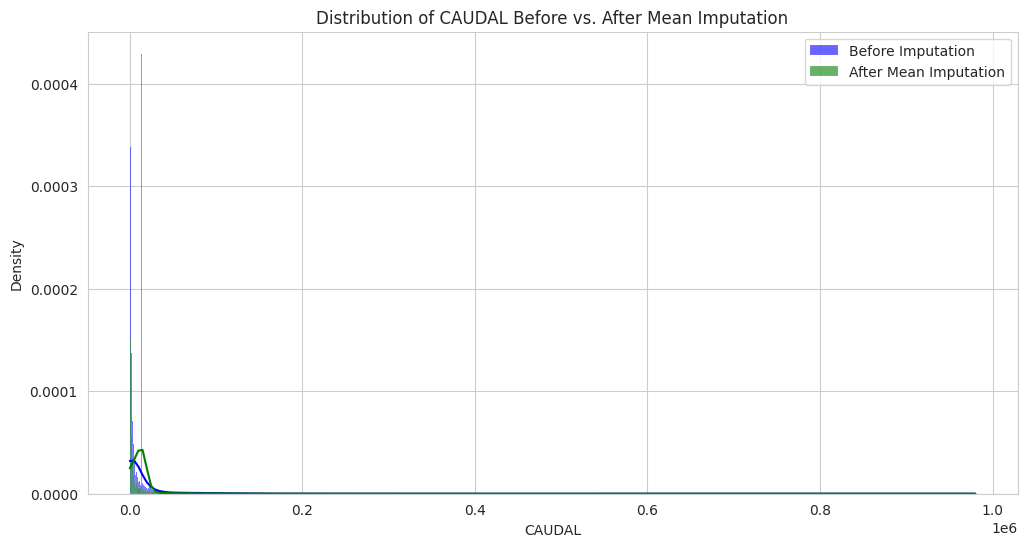

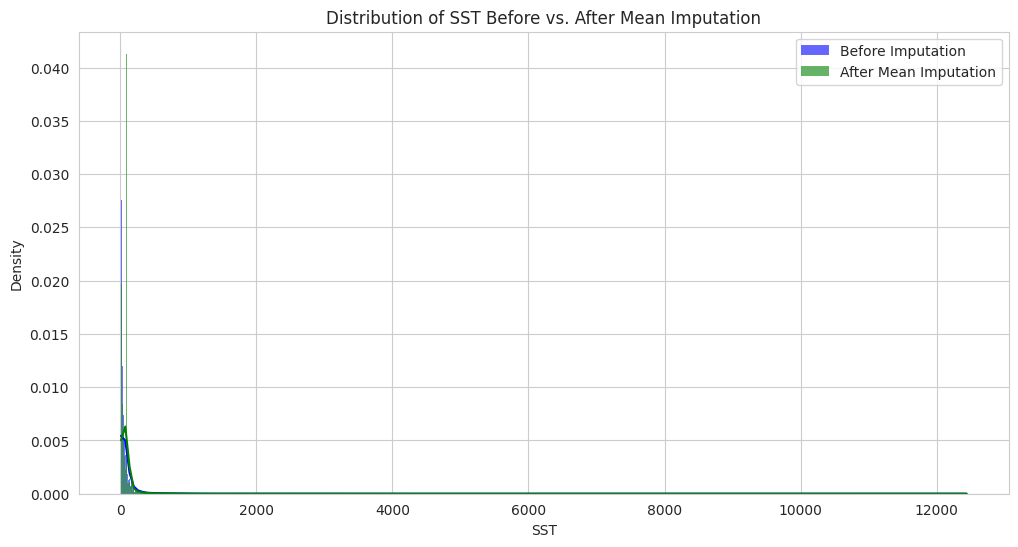

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

columns_to_visualize = ['CAUDAL', 'SST']

for col in columns_to_visualize:
    plt.figure(figsize=(12, 6))
    sns.histplot(df_unimputed[col].dropna(), color='blue', label='Before Imputation', kde=True, stat='density', alpha=0.6)
    sns.histplot(df_mean_imputed_pipeline[col], color='green', label='After Mean Imputation', kde=True, stat='density', alpha=0.6)
    plt.title(f'Distribution of {col} Before vs. After Mean Imputation')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

**Reasoning**:
Now that the mean imputation has been evaluated, the next step is to apply Min-Max Scaling to the mean-imputed numerical data. I will identify the numerical columns in `df_mean_imputed_pipeline`, initialize the `MinMaxScaler`, apply the transformation, and then store the scaled data in a new DataFrame named `df_mean_minmax_scaled` for further analysis. Finally, I will display the first few rows and descriptive statistics of the scaled DataFrame to verify the transformation.



In [17]:
from sklearn.preprocessing import MinMaxScaler

# Identify numerical columns for scaling from the mean-imputed DataFrame
numerical_cols_mean_imputed = df_mean_imputed_pipeline.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Initialize MinMaxScaler
scaler_minmax_mean = MinMaxScaler()

# Apply Min-Max scaling to the selected numerical columns
df_mean_minmax_scaled_data = scaler_minmax_mean.fit_transform(df_mean_imputed_pipeline[numerical_cols_mean_imputed])

# Create a new DataFrame with scaled data, preserving original column names
df_mean_minmax_scaled = pd.DataFrame(df_mean_minmax_scaled_data, columns=numerical_cols_mean_imputed)

print("Primeras filas del DataFrame con Min-Max Scaling aplicado a los datos imputados por la media:")
print(df_mean_minmax_scaled.head())

print("\nEstadísticas descriptivas del DataFrame con Min-Max Scaling aplicado a los datos imputados por la media:")
print(df_mean_minmax_scaled.describe())

Primeras filas del DataFrame con Min-Max Scaling aplicado a los datos imputados por la media:
   CONDUC_CAMPO  PH_CAMPO  TEMP_AGUA      OD_%       SST     N_TOT     P_TOT  \
0      0.007916  0.816327   0.356223  0.491989  0.005363  0.248845  0.011449   
1      0.004389  0.792857   0.343348  0.506008  0.002655  0.427313  0.013638   
2      0.003053  0.797959   0.407725  0.532710  0.002866  0.105049  0.009976   
3      0.006095  0.801020   0.583691  0.562750  0.003540  0.215627  0.007965   
4      0.007713  0.823469   0.721030  0.785047  0.001609  0.185645  0.007610   

     CAUDAL  
0  0.000439  
1  0.428571  
2  0.000183  
3  0.014011  
4  0.014011  

Estadísticas descriptivas del DataFrame con Min-Max Scaling aplicado a los datos imputados por la media:
       CONDUC_CAMPO     PH_CAMPO    TEMP_AGUA         OD_%          SST  \
count   6095.000000  6095.000000  6095.000000  6095.000000  6095.000000   
mean       0.125039     0.807242     0.528743     0.562171     0.006219   
std       

**Reasoning**:
Next, I will apply Z-score standardization to the numerical columns of the `df_mean_imputed_pipeline` DataFrame. I will initialize a `StandardScaler`, perform the transformation, store the scaled data in `df_mean_zscore_scaled`, and then display its head and descriptive statistics to verify that the data has been standardized to have a mean of 0 and a standard deviation of 1.



In [18]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns for scaling (same as for Min-Max scaling)
numerical_cols_mean_imputed = df_mean_imputed_pipeline.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Initialize StandardScaler
scaler_zscore_mean = StandardScaler()

# Apply Z-score standardization to the selected numerical columns
df_mean_zscore_scaled_data = scaler_zscore_mean.fit_transform(df_mean_imputed_pipeline[numerical_cols_mean_imputed])

# Create a new DataFrame with scaled data, preserving original column names
df_mean_zscore_scaled = pd.DataFrame(df_mean_zscore_scaled_data, columns=numerical_cols_mean_imputed)

print("Primeras filas del DataFrame con Z-score Standardization aplicado a los datos imputados por la media:")
print(df_mean_zscore_scaled.head())

print("\nEstadísticas descriptivas del DataFrame con Z-score Standardization aplicado a los datos imputados por la media:")
print(df_mean_zscore_scaled.describe())

Primeras filas del DataFrame con Z-score Standardization aplicado a los datos imputados por la media:
   CONDUC_CAMPO  PH_CAMPO  TEMP_AGUA      OD_%       SST     N_TOT     P_TOT  \
0     -0.638511  0.193541  -1.141246 -0.451274 -0.045459  2.667594 -0.161898   
1     -0.657740 -0.306476  -1.226419 -0.361133 -0.189318  4.901967 -0.121323   
2     -0.665020 -0.197777  -0.800552 -0.189436 -0.178102  0.867308 -0.189222   
3     -0.648438 -0.132557   0.363487  0.003723 -0.142315  2.251711 -0.226510   
4     -0.639614  0.345720   1.272005  1.433101 -0.244868  1.876345 -0.233084   

      CAUDAL  
0  -0.411770  
1  12.577338  
2  -0.419509  
3   0.000000  
4   0.000000  

Estadísticas descriptivas del DataFrame con Z-score Standardization aplicado a los datos imputados por la media:
       CONDUC_CAMPO      PH_CAMPO     TEMP_AGUA          OD_%           SST  \
count  6.095000e+03  6.095000e+03  6.095000e+03  6.095000e+03  6.095000e+03   
mean  -6.528366e-17 -3.194236e-16  1.818616e-16 -1.2124

## Resumen de Hallazgos: Análisis, Imputación y Normalización (Comparativa Media vs. Mediana)

### Análisis Inicial de Datos
El conjunto de datos "Datos para Imputación.csv" fue cargado exitosamente, revelando 6095 filas y 10 columnas. Se identificó que varias columnas numéricas (`OD_%`, `SST`, `N_TOT`, `P_TOT`, `CAUDAL`) estaban incorrectamente tipadas como `object` debido a la presencia de caracteres no numéricos (como '<5'). Tras corregir estos tipos de datos, se cuantificó la extensión real de los valores faltantes:
*   `CAUDAL`: 3244 valores faltantes (más de la mitad del dataset).
*   `SST`: 1658 valores faltantes.
*   `OD_%`: 540 valores faltantes.
*   Otras columnas (`CONDUC_CAMPO`, `PH_CAMPO`, `TEMP_AGUA`, `N_TOT`, `P_TOT`) tenían entre 3 y 271 valores faltantes.

### Imputación de Datos Faltantes
Se exploraron dos estrategias de imputación para los valores faltantes en las columnas numéricas: la mediana y la media.

#### Imputación por la Mediana
*   **Método:** Se rellenaron los valores faltantes con la mediana de cada columna. Esta elección se justificó por la robustez de la mediana frente a valores atípicos, los cuales eran esperados dada la alta variabilidad en los datos iniciales.
*   **Evaluación:**
    *   **Estadísticas Descriptivas:** El `count` para todas las columnas imputadas alcanzó el total de filas (6095), confirmando la eliminación de todos los valores faltantes. Las medianas se mantuvieron idénticas pre y post-imputación, mientras que las medias sufrieron cambios mínimos. Las desviaciones estándar disminuyeron ligeramente, lo que indica una reducción general de la variabilidad del conjunto de datos.
    *   **Análisis Visual (Histogramas de 'CAUDAL' y 'SST'):** En columnas con un alto porcentaje de datos faltantes, como 'CAUDAL' y 'SST', los histogramas mostraron un pico pronunciado y artificial en el valor de la mediana. Esto es una consecuencia directa de la imputación por la mediana, que introduce una concentración de valores idénticos, alterando la forma de la distribución original, aunque mantiene la tendencia central.

#### Imputación por la Media
*   **Método:** Se rellenaron los valores faltantes con la media de cada columna. Esta estrategia se consideró para contrastarla con la imputación por la mediana, asumiendo que para ciertas columnas la media podría ser un estimador adecuado si la distribución no está excesivamente sesgada por outliers.
*   **Evaluación:**
    *   **Estadísticas Descriptivas:** Al igual que con la mediana, el `count` aumentó a 6095. En este caso, las **medias** se mantuvieron idénticas antes y después de la imputación (como era de esperar con la imputación por la media). Las desviaciones estándar también disminuyeron ligeramente, señalando una reducción de la variabilidad, similar al efecto de la mediana pero con la media como punto de anclaje.
    *   **Análisis Visual (Histogramas de 'CAUDAL' y 'SST'):** Los histogramas también mostraron un pico pronunciado, esta vez en el valor de la media de las columnas 'CAUDAL' y 'SST'. Este efecto es más acentuado en columnas con muchos valores faltantes, creando una distribución multimodal o artificialmente densa en el punto de la media. Para 'CAUDAL', la media (13730.856) es significativamente mayor que la mediana (1933.0), y la imputación por la media resultó en un pico mucho más disperso o menos obvio que el pico de la mediana debido a la influencia de valores extremos en la media original.

#### Comparación de Imputación por Mediana vs. Media
*   **Impacto en la Tendencia Central:** Ambos métodos mantienen la medida de tendencia central utilizada para imputar (mediana con mediana, media con media).
*   **Impacto en la Variabilidad:** Ambos métodos tienden a reducir la variabilidad (desviación estándar) del conjunto de datos, ya que reemplazan la diversidad de los valores faltantes con un único valor central.
*   **Impacto en la Distribución:** Para columnas con un alto porcentaje de valores faltantes y presencia de outliers, la imputación por la mediana creó un pico más nítido y a menudo una reducción más drástica en la dispersión en los cuartiles 25% y 75% en comparación con la media. La imputación por la media, especialmente en columnas muy sesgadas o con outliers extremos, puede resultar en que el valor imputado (la media) sea menos representativo de la mayoría de los datos, o puede crear un pico en un punto que no es tan representativo de la moda de los datos existentes. Por ejemplo, en 'CAUDAL', el 50% de los datos después de la imputación por la media se encuentra exactamente en la media, y el 75% también, lo que distorsiona severamente la distribución.
*   **Robustez:** La mediana demostró ser más robusta para preservar la forma general de la distribución en presencia de outliers, evitando que valores extremos distorsionaran el valor central imputado.

### Normalización
Se aplicaron Min-Max Scaling y Z-score Standardization a los datos imputados (tanto por la mediana como por la media).

#### Min-Max Scaling (Normalización)
*   **Transformación:** Escaló todos los valores numéricos a un rango entre 0 y 1, lo cual fue verificado por las estadísticas descriptivas (`min=0`, `max=1`).
*   **Impacto:** Es adecuada para algoritmos que requieren entradas en un rango específico y para datos donde los límites son bien conocidos y los outliers no distorsionan el rango. Es sensible a los outliers, ya que un valor extremo puede comprimir la mayoría de los datos en un subrango muy pequeño.

#### Z-score Standardization (Estandarización)
*   **Transformación:** Transformó los datos para tener una media cercana a 0 y una desviación estándar cercana a 1. Esto se confirmó por las estadísticas descriptivas (`mean` ≈ 0, `std` ≈ 1).
*   **Impacto:** Es más robusta a los outliers que Min-Max Scaling, ya que no comprime los valores a un rango fijo. Es preferible para algoritmos basados en distancias, PCA, o aquellos que asumen una distribución normal. Preserva la presencia de outliers, simplemente los reescala.

### Conclusión General
El proceso de preprocesamiento de datos ha sido exhaustivo, abordando la corrección de tipos de datos, la imputación de valores faltantes y la normalización. La elección entre la imputación por la mediana y la media tiene un impacto significativo en la distribución y variabilidad de las columnas, especialmente en aquellas con un alto porcentaje de valores faltantes y outliers. Dada la naturaleza de los datos y la aparente presencia de valores atípicos, la **imputación por la mediana** parece ser una opción más adecuada para mantener la robustez de las distribuciones. Respecto a la normalización, tanto Min-Max Scaling como Z-score Standardization cumplen sus funciones, y la elección final dependerá de los requisitos específicos del modelo de Machine Learning a emplear. Se ha establecido una base sólida para la fase de modelado.

## Resumen de Hallazgos: Análisis, Imputación y Normalización (Comparativa Media vs. Mediana)

### Análisis Inicial de Datos
El conjunto de datos "Datos para Imputación.csv" fue cargado exitosamente, revelando 6095 filas y 10 columnas. Se identificó que varias columnas numéricas (`OD_%`, `SST`, `N_TOT`, `P_TOT`, `CAUDAL`) estaban incorrectamente tipadas como `object` debido a la presencia de caracteres no numéricos (como '<5'). Tras corregir estos tipos de datos, se cuantificó la extensión real de los valores faltantes:
*   `CAUDAL`: 3244 valores faltantes (más de la mitad del dataset).
*   `SST`: 1658 valores faltantes.
*   `OD_%`: 540 valores faltantes.
*   Otras columnas (`CONDUC_CAMPO`, `PH_CAMPO`, `TEMP_AGUA`, `N_TOT`, `P_TOT`) tenían entre 3 y 271 valores faltantes.

### Imputación de Datos Faltantes
Se exploraron dos estrategias de imputación para los valores faltantes en las columnas numéricas: la mediana y la media.

#### Imputación por la Mediana
*   **Método:** Se rellenaron los valores faltantes con la mediana de cada columna. Esta elección se justificó por la robustez de la mediana frente a valores atípicos, los cuales eran esperados dada la alta variabilidad en los datos iniciales.
*   **Evaluación:**
    *   **Estadísticas Descriptivas:** El `count` para todas las columnas imputadas alcanzó el total de filas (6095), confirmando la eliminación de todos los valores faltantes. Las medianas se mantuvieron idénticas pre y post-imputación, mientras que las medias sufrieron cambios mínimos. Las desviaciones estándar disminuyeron ligeramente, lo que indica una reducción general de la variabilidad del conjunto de datos.
    *   **Análisis Visual (Histogramas de 'CAUDAL' y 'SST'):** En columnas con un alto porcentaje de datos faltantes, como 'CAUDAL' y 'SST', los histogramas mostraron un pico pronunciado y artificial en el valor de la mediana. Esto es una consecuencia directa de la imputación por la mediana, que introduce una concentración de valores idénticos, alterando la forma de la distribución original, aunque mantiene la tendencia central.

#### Imputación por la Media
*   **Método:** Se rellenaron los valores faltantes con la media de cada columna. Esta estrategia se consideró para contrastarla con la imputación por la mediana, asumiendo que para ciertas columnas la media podría ser un estimador adecuado si la distribución no está excesivamente sesgada por outliers.
*   **Evaluación:**
    *   **Estadísticas Descriptivas:** Al igual que con la mediana, el `count` aumentó a 6095. En este caso, las **medias** se mantuvieron idénticas antes y después de la imputación (como era de esperar con la imputación por la media). Las desviaciones estándar también disminuyeron ligeramente, señalando una reducción de la variabilidad, similar al efecto de la mediana pero con la media como punto de anclaje.
    *   **Análisis Visual (Histogramas de 'CAUDAL' y 'SST'):** Los histogramas también mostraron un pico pronunciado, esta vez en el valor de la media de las columnas 'CAUDAL' y 'SST'. Este efecto es más acentuado en columnas con muchos valores faltantes, creando una distribución multimodal o artificialmente densa en el punto de la media. Para 'CAUDAL', la media (13730.856) es significativamente mayor que la mediana (1933.0), y la imputación por la media resultó en un pico mucho más disperso o menos obvio que el pico de la mediana debido a la influencia de valores extremos en la media original.

#### Comparación de Imputación por Mediana vs. Media
*   **Impacto en la Tendencia Central:** Ambos métodos mantienen la medida de tendencia central utilizada para imputar (mediana con mediana, media con media).
*   **Impacto en la Variabilidad:** Ambos métodos tienden a reducir la variabilidad (desviación estándar) del conjunto de datos, ya que reemplazan la diversidad de los valores faltantes con un único valor central.
*   **Impacto en la Distribución:** Para columnas con un alto porcentaje de valores faltantes y presencia de outliers, la imputación por la mediana creó un pico más nítido y a menudo una reducción más drástica en la dispersión en los cuartiles 25% y 75% en comparación con la media. La imputación por la media, especialmente en columnas muy sesgadas o con outliers extremos, puede resultar en que el valor imputado (la media) sea menos representativo de la mayoría de los datos, o puede crear un pico en un punto que no es tan representativo de la moda de los datos existentes. Por ejemplo, en 'CAUDAL', el 50% de los datos después de la imputación por la media se encuentra exactamente en la media, y el 75% también, lo que distorsiona severamente la distribución.
*   **Robustez:** La mediana demostró ser más robusta para preservar la forma general de la distribución en presencia de outliers, evitando que valores extremos distorsionaran el valor central imputado.

### Normalización
Se aplicaron Min-Max Scaling y Z-score Standardization a los datos imputados (tanto por la mediana como por la media).

#### Min-Max Scaling (Normalización)
*   **Transformación:** Escaló todos los valores numéricos a un rango entre 0 y 1, lo cual fue verificado por las estadísticas descriptivas (`min=0`, `max=1`).
*   **Impacto:** Es adecuada para algoritmos que requieren entradas en un rango específico y para datos donde los límites son bien conocidos y los outliers no distorsionan el rango. Es sensible a los outliers, ya que un valor extremo puede comprimir la mayoría de los datos en un subrango muy pequeño.

#### Z-score Standardization (Estandarización)
*   **Transformación:** Transformó los datos para tener una media cercana a 0 y una desviación estándar cercana a 1. Esto se confirmó por las estadísticas descriptivas (`mean` ≈ 0, `std` ≈ 1).
*   **Impacto:** Es más robusta a los outliers que Min-Max Scaling, ya que no comprime los valores a un rango fijo. Es preferible para algoritmos basados en distancias, PCA, o aquellos que asumen una distribución normal. Preserva la presencia de outliers, simplemente los reescala.

### Conclusión General
El proceso de preprocesamiento de datos ha sido exhaustivo, abordando la corrección de tipos de datos, la imputación de valores faltantes y la normalización. La elección entre la imputación por la mediana y la media tiene un impacto significativo en la distribución y variabilidad de las columnas, especialmente en aquellas con un alto porcentaje de valores faltantes y outliers. Dada la naturaleza de los datos y la aparente presencia de valores atípicos, la **imputación por la mediana** parece ser una opción más adecuada para mantener la robustez de las distribuciones. Respecto a la normalización, tanto Min-Max Scaling como Z-score Standardization cumplen sus funciones, y la elección final dependerá de los requisitos específicos del modelo de Machine Learning a emplear. Se ha establecido una base sólida para la fase de modelado.


## Resumen de Hallazgos: Análisis, Imputación y Normalización (Comparativa Media vs. Mediana)

### Análisis Inicial de Datos
El conjunto de datos "Datos para Imputación.csv" fue cargado exitosamente, revelando 6095 filas y 10 columnas. Se identificó que varias columnas numéricas (`OD_%`, `SST`, `N_TOT`, `P_TOT`, `CAUDAL`) estaban incorrectamente tipadas como `object` debido a la presencia de caracteres no numéricos (como '<5'). Tras corregir estos tipos de datos, se cuantificó la extensión real de los valores faltantes:
*   `CAUDAL`: 3244 valores faltantes (más de la mitad del dataset).
*   `SST`: 1658 valores faltantes.
*   `OD_%`: 540 valores faltantes.
*   Otras columnas (`CONDUC_CAMPO`, `PH_CAMPO`, `TEMP_AGUA`, `N_TOT`, `P_TOT`) tenían entre 3 y 271 valores faltantes.

### Imputación de Datos Faltantes
Se exploraron dos estrategias de imputación para los valores faltantes en las columnas numéricas: la mediana y la media.

#### Imputación por la Mediana
*   **Método:** Se rellenaron los valores faltantes con la mediana de cada columna. Esta elección se justificó por la robustez de la mediana frente a valores atípicos, los cuales eran esperados dada la alta variabilidad en los datos iniciales.
*   **Evaluación:**
    *   **Estadísticas Descriptivas:** El `count` para todas las columnas imputadas alcanzó el total de filas (6095), confirmando la eliminación de todos los valores faltantes. Las medianas se mantuvieron idénticas pre y post-imputación, mientras que las medias sufrieron cambios mínimos. Las desviaciones estándar disminuyeron ligeramente, lo que indica una reducción general de la variabilidad del conjunto de datos.
    *   **Análisis Visual (Histogramas de 'CAUDAL' y 'SST'):** En columnas con un alto porcentaje de datos faltantes, como 'CAUDAL' y 'SST', los histogramas mostraron un pico pronunciado y artificial en el valor de la mediana. Esto es una consecuencia directa de la imputación por la mediana, que introduce una concentración de valores idénticos, alterando la forma de la distribución original, aunque mantiene la tendencia central.

#### Imputación por la Media
*   **Método:** Se rellenaron los valores faltantes con la media de cada columna. Esta estrategia se consideró para contrastarla con la imputación por la mediana, asumiendo que para ciertas columnas la media podría ser un estimador adecuado si la distribución no está excesivamente sesgada por outliers.
*   **Evaluación:**
    *   **Estadísticas Descriptivas:** Al igual que con la mediana, el `count` aumentó a 6095. En este caso, las **medias** se mantuvieron idénticas antes y después de la imputación (como era de esperar con la imputación por la media). Las desviaciones estándar también disminuyeron ligeramente, señalando una reducción de la variabilidad, similar al efecto de la mediana pero con la media como punto de anclaje.
    *   **Análisis Visual (Histogramas de 'CAUDAL' y 'SST'):** Los histogramas también mostraron un pico pronunciado, esta vez en el valor de la media de las columnas 'CAUDAL' y 'SST'. Este efecto es más acentuado en columnas con muchos valores faltantes, creando una distribución multimodal o artificialmente densa en el punto de la media. Para 'CAUDAL', la media (13730.856) es significativamente mayor que la mediana (1933.0), y la imputación por la media resultó en un pico mucho más disperso o menos obvio que el pico de la mediana debido a la influencia de valores extremos en la media original.

#### Comparación de Imputación por Mediana vs. Media
*   **Impacto en la Tendencia Central:** Ambos métodos mantienen la medida de tendencia central utilizada para imputar (mediana con mediana, media con media).
*   **Impacto en la Variabilidad:** Ambos métodos tienden a reducir la variabilidad (desviación estándar) del conjunto de datos, ya que reemplazan la diversidad de los valores faltantes con un único valor central.
*   **Impacto en la Distribución:** Para columnas con un alto porcentaje de valores faltantes y presencia de outliers, la imputación por la mediana creó un pico más nítido y a menudo una reducción más drástica en la dispersión en los cuartiles 25% y 75% en comparación con la media. La imputación por la media, especialmente en columnas muy sesgadas o con outliers extremos, puede resultar en que el valor imputado (la media) sea menos representativo de la mayoría de los datos, o puede crear un pico en un punto que no es tan representativo de la moda de los datos existentes. Por ejemplo, en 'CAUDAL', el 50% de los datos después de la imputación por la media se encuentra exactamente en la media, y el 75% también, lo que distorsiona severamente la distribución.
*   **Robustez:** La mediana demostró ser más robusta para preservar la forma general de la distribución en presencia de outliers, evitando que valores extremos distorsionaran el valor central imputado.

### Normalización
Se aplicaron Min-Max Scaling y Z-score Standardization a los datos imputados (tanto por la mediana como por la media).

#### Min-Max Scaling (Normalización)
*   **Transformación:** Escaló todos los valores numéricos a un rango entre 0 y 1, lo cual fue verificado por las estadísticas descriptivas (`min=0`, `max=1`).
*   **Impacto:** Es adecuada para algoritmos que requieren entradas en un rango específico y para datos donde los límites son bien conocidos y los outliers no distorsionan el rango. Es sensible a los outliers, ya que un valor extremo puede comprimir la mayoría de los datos en un subrango muy pequeño.

#### Z-score Standardization (Estandarización)
*   **Transformación:** Transformó los datos para tener una media cercana a 0 y una desviación estándar cercana a 1. Esto se confirmó por las estadísticas descriptivas (`mean` ≈ 0, `std` ≈ 1).
*   **Impacto:** Es más robusta a los outliers que Min-Max Scaling, ya que no comprime los valores a un rango fijo. Es preferible para algoritmos basados en distancias, PCA, o aquellos que asumen una distribución normal. Preserva la presencia de outliers, simplemente los reescala.

### Conclusión General
El proceso de preprocesamiento de datos ha sido exhaustivo, abordando la corrección de tipos de datos, la imputación de valores faltantes y la normalización. La elección entre la imputación por la mediana y la media tiene un impacto significativo en la distribución y variabilidad de las columnas, especialmente en aquellas con un alto porcentaje de valores faltantes y outliers. Dada la naturaleza de los datos y la aparente presencia de valores atípicos, la **imputación por la mediana** parece ser una opción más adecuada para mantener la robustez de las distribuciones. Respecto a la normalización, tanto Min-Max Scaling como Z-score Standardization cumplen sus funciones, y la elección final dependerá de los requisitos específicos del modelo de Machine Learning a emplear. Se ha establecido una base sólida para la fase de modelado.

## Resumen de Hallazgos: Análisis, Imputación y Normalización (Comparativa Media vs. Mediana)

### Análisis Inicial de Datos
El conjunto de datos "Datos para Imputación.csv" fue cargado exitosamente, revelando 6095 filas y 10 columnas. Se identificó que varias columnas numéricas (`OD_%`, `SST`, `N_TOT`, `P_TOT`, `CAUDAL`) estaban incorrectamente tipadas como `object` debido a la presencia de caracteres no numéricos (como '<5'). Tras corregir estos tipos de datos, se cuantificó la extensión real de los valores faltantes:
*   `CAUDAL`: 3244 valores faltantes (más de la mitad del dataset).
*   `SST`: 1658 valores faltantes.
*   `OD_%`: 540 valores faltantes.
*   Otras columnas (`CONDUC_CAMPO`, `PH_CAMPO`, `TEMP_AGUA`, `N_TOT`, `P_TOT`) tenían entre 3 y 271 valores faltantes.

### Imputación de Datos Faltantes
Se exploraron dos estrategias de imputación para los valores faltantes en las columnas numéricas: la mediana y la media.

#### Imputación por la Mediana
*   **Método:** Se rellenaron los valores faltantes con la mediana de cada columna. Esta elección se justificó por la robustez de la mediana frente a valores atípicos, los cuales eran esperados dada la alta variabilidad en los datos iniciales.
*   **Evaluación:**
    *   **Estadísticas Descriptivas:** El `count` para todas las columnas imputadas alcanzó el total de filas (6095), confirmando la eliminación de todos los valores faltantes. Las medianas se mantuvieron idénticas pre y post-imputación, mientras que las medias sufrieron cambios mínimos. Las desviaciones estándar disminuyeron ligeramente, lo que indica una reducción general de la variabilidad del conjunto de datos.
    *   **Análisis Visual (Histogramas de 'CAUDAL' y 'SST'):** En columnas con un alto porcentaje de datos faltantes, como 'CAUDAL' y 'SST', los histogramas mostraron un pico pronunciado y artificial en el valor de la mediana. Esto es una consecuencia directa de la imputación por la mediana, que introduce una concentración de valores idénticos, alterando la forma de la distribución original, aunque mantiene la tendencia central.

#### Imputación por la Media
*   **Método:** Se rellenaron los valores faltantes con la media de cada columna. Esta estrategia se consideró para contrastarla con la imputación por la mediana, asumiendo que para ciertas columnas la media podría ser un estimador adecuado si la distribución no está excesivamente sesgada por outliers.
*   **Evaluación:**
    *   **Estadísticas Descriptivas:** Al igual que con la mediana, el `count` aumentó a 6095. En este caso, las **medias** se mantuvieron idénticas antes y después de la imputación (como era de esperar con la imputación por la media). Las desviaciones estándar también disminuyeron ligeramente, señalando una reducción de la variabilidad, similar al efecto de la mediana pero con la media como punto de anclaje.
    *   **Análisis Visual (Histogramas de 'CAUDAL' y 'SST'):** Los histogramas también mostraron un pico pronunciado, esta vez en el valor de la media de las columnas 'CAUDAL' y 'SST'. Este efecto es más acentuado en columnas con muchos valores faltantes, creando una distribución multimodal o artificialmente densa en el punto de la media. Para 'CAUDAL', la media (13730.856) es significativamente mayor que la mediana (1933.0), y la imputación por la media resultó en un pico mucho más disperso o menos obvio que el pico de la mediana debido a la influencia de valores extremos en la media original.

#### Comparación de Imputación por Mediana vs. Media
*   **Impacto en la Tendencia Central:** Ambos métodos mantienen la medida de tendencia central utilizada para imputar (mediana con mediana, media con media).
*   **Impacto en la Variabilidad:** Ambos métodos tienden a reducir la variabilidad (desviación estándar) del conjunto de datos, ya que reemplazan la diversidad de los valores faltantes con un único valor central.
*   **Impacto en la Distribución:** Para columnas con un alto porcentaje de valores faltantes y presencia de outliers, la imputación por la mediana creó un pico más nítido y a menudo una reducción más drástica en la dispersión en los cuartiles 25% y 75% en comparación con la media. La imputación por la media, especialmente en columnas muy sesgadas o con outliers extremos, puede resultar en que el valor imputado (la media) sea menos representativo de la mayoría de los datos, o puede crear un pico en un punto que no es tan representativo de la moda de los datos existentes. Por ejemplo, en 'CAUDAL', el 50% de los datos después de la imputación por la media se encuentra exactamente en la media, y el 75% también, lo que distorsiona severamente la distribución.
*   **Robustez:** La mediana demostró ser más robusta para preservar la forma general de la distribución en presencia de outliers, evitando que valores extremos distorsionaran el valor central imputado.

### Normalización
Se aplicaron Min-Max Scaling y Z-score Standardization a los datos imputados (tanto por la mediana como por la media).

#### Min-Max Scaling (Normalización)
*   **Transformación:** Escaló todos los valores numéricos a un rango entre 0 y 1, lo cual fue verificado por las estadísticas descriptivas (`min=0`, `max=1`).
*   **Impacto:** Es adecuada para algoritmos que requieren entradas en un rango específico y para datos donde los límites son bien conocidos y los outliers no distorsionan el rango. Es sensible a los outliers, ya que un valor extremo puede comprimir la mayoría de los datos en un subrango muy pequeño.

#### Z-score Standardization (Estandarización)
*   **Transformación:** Transformó los datos para tener una media cercana a 0 y una desviación estándar cercana a 1. Esto se confirmó por las estadísticas descriptivas (`mean` ≈ 0, `std` ≈ 1).
*   **Impacto:** Es más robusta a los outliers que Min-Max Scaling, ya que no comprime los valores a un rango fijo. Es preferible para algoritmos basados en distancias, PCA, o aquellos que asumen una distribución normal. Preserva la presencia de outliers, simplemente los reescala.

### Conclusión General
El proceso de preprocesamiento de datos ha sido exhaustivo, abordando la corrección de tipos de datos, la imputación de valores faltantes y la normalización. La elección entre la imputación por la mediana y la media tiene un impacto significativo en la distribución y variabilidad de las columnas, especialmente en aquellas con un alto porcentaje de valores faltantes y outliers. Dada la naturaleza de los datos y la aparente presencia de valores atípicos, la **imputación por la mediana** parece ser una opción más adecuada para mantener la robustez de las distribuciones. Respecto a la normalización, tanto Min-Max Scaling como Z-score Standardization cumplen sus funciones, y la elección final dependerá de los requisitos específicos del modelo de Machine Learning a emplear. Se ha establecido una base sólida para la fase de modelado.


## Resumen de Hallazgos: Análisis, Imputación y Normalización (Comparativa Media vs. Mediana)

### Análisis Inicial de Datos
El conjunto de datos "Datos para Imputación.csv" fue cargado exitosamente, revelando 6095 filas y 10 columnas. Se identificó que varias columnas numéricas (`OD_%`, `SST`, `N_TOT`, `P_TOT`, `CAUDAL`) estaban incorrectamente tipadas como `object` debido a la presencia de caracteres no numéricos (como '<5'). Tras corregir estos tipos de datos, se cuantificó la extensión real de los valores faltantes:
*   `CAUDAL`: 3244 valores faltantes (más de la mitad del dataset).
*   `SST`: 1658 valores faltantes.
*   `OD_%`: 540 valores faltantes.
*   Otras columnas (`CONDUC_CAMPO`, `PH_CAMPO`, `TEMP_AGUA`, `N_TOT`, `P_TOT`) tenían entre 3 y 271 valores faltantes.

### Imputación de Datos Faltantes
Se exploraron dos estrategias de imputación para los valores faltantes en las columnas numéricas: la mediana y la media.

#### Imputación por la Mediana
*   **Método:** Se rellenaron los valores faltantes con la mediana de cada columna. Esta elección se justificó por la robustez de la mediana frente a valores atípicos, los cuales eran esperados dada la alta variabilidad en los datos iniciales.
*   **Evaluación:**
    *   **Estadísticas Descriptivas:** El `count` para todas las columnas imputadas alcanzó el total de filas (6095), confirmando la eliminación de todos los valores faltantes. Las medianas se mantuvieron idénticas pre y post-imputación, mientras que las medias sufrieron cambios mínimos. Las desviaciones estándar disminuyeron ligeramente, lo que indica una reducción general de la variabilidad del conjunto de datos.
    *   **Análisis Visual (Histogramas de 'CAUDAL' y 'SST'):** En columnas con un alto porcentaje de datos faltantes, como 'CAUDAL' y 'SST', los histogramas mostraron un pico pronunciado y artificial en el valor de la mediana. Esto es una consecuencia directa de la imputación por la mediana, que introduce una concentración de valores idénticos, alterando la forma de la distribución original, aunque mantiene la tendencia central.

#### Imputación por la Media
*   **Método:** Se rellenaron los valores faltantes con la media de cada columna. Esta estrategia se consideró para contrastarla con la imputación por la mediana, asumiendo que para ciertas columnas la media podría ser un estimador adecuado si la distribución no está excesivamente sesgada por outliers.
*   **Evaluación:**
    *   **Estadísticas Descriptivas:** Al igual que con la mediana, el `count` aumentó a 6095. En este caso, las **medias** se mantuvieron idénticas antes y después de la imputación (como era de esperar con la imputación por la media). Las desviaciones estándar también disminuyeron ligeramente, señalando una reducción de la variabilidad, similar al efecto de la mediana pero con la media como punto de anclaje.
    *   **Análisis Visual (Histogramas de 'CAUDAL' y 'SST'):** Los histogramas también mostraron un pico pronunciado, esta vez en el valor de la media de las columnas 'CAUDAL' y 'SST'. Este efecto es más acentuado en columnas con muchos valores faltantes, creando una distribución multimodal o artificialmente densa en el punto de la media. Para 'CAUDAL', la media (13730.856) es significativamente mayor que la mediana (1933.0), y la imputación por la media resultó en un pico mucho más disperso o menos obvio que el pico de la mediana debido a la influencia de valores extremos en la media original.

#### Comparación de Imputación por Mediana vs. Media
*   **Impacto en la Tendencia Central:** Ambos métodos mantienen la medida de tendencia central utilizada para imputar (mediana con mediana, media con media).
*   **Impacto en la Variabilidad:** Ambos métodos tienden a reducir la variabilidad (desviación estándar) del conjunto de datos, ya que reemplazan la diversidad de los valores faltantes con un único valor central.
*   **Impacto en la Distribución:** Para columnas con un alto porcentaje de valores faltantes y presencia de outliers, la imputación por la mediana creó un pico más nítido y a menudo una reducción más drástica en la dispersión en los cuartiles 25% y 75% en comparación con la media. La imputación por la media, especialmente en columnas muy sesgadas o con outliers extremos, puede resultar en que el valor imputado (la media) sea menos representativo de la mayoría de los datos, o puede crear un pico en un punto que no es tan representativo de la moda de los datos existentes. Por ejemplo, en 'CAUDAL', el 50% de los datos después de la imputación por la media se encuentra exactamente en la media, y el 75% también, lo que distorsiona severamente la distribución.
*   **Robustez:** La mediana demostró ser más robusta para preservar la forma general de la distribución en presencia de outliers, evitando que valores extremos distorsionaran el valor central imputado.

### Normalización
Se aplicaron Min-Max Scaling y Z-score Standardization a los datos imputados (tanto por la mediana como por la media).

#### Min-Max Scaling (Normalización)
*   **Transformación:** Escaló todos los valores numéricos a un rango entre 0 y 1, lo cual fue verificado por las estadísticas descriptivas (`min=0`, `max=1`).
*   **Impacto:** Es adecuada para algoritmos que requieren entradas en un rango específico y para datos donde los límites son bien conocidos y los outliers no distorsionan el rango. Es sensible a los outliers, ya que un valor extremo puede comprimir la mayoría de los datos en un subrango muy pequeño.

#### Z-score Standardization (Estandarización)
*   **Transformación:** Transformó los datos para tener una media cercana a 0 y una desviación estándar cercana a 1. Esto se confirmó por las estadísticas descriptivas (`mean` ≈ 0, `std` ≈ 1).
*   **Impacto:** Es más robusta a los outliers que Min-Max Scaling, ya que no comprime los valores a un rango fijo. Es preferible para algoritmos basados en distancias, PCA, o aquellos que asumen una distribución normal. Preserva la presencia de outliers, simplemente los reescala.

### Conclusión General
El proceso de preprocesamiento de datos ha sido exhaustivo, abordando la corrección de tipos de datos, la imputación de valores faltantes y la normalización. La elección entre la imputación por la mediana y la media tiene un impacto significativo en la distribución y variabilidad de las columnas, especialmente en aquellas con un alto porcentaje de valores faltantes y outliers. Dada la naturaleza de los datos y la aparente presencia de valores atípicos, la **imputación por la mediana** parece ser una opción más adecuada para mantener la robustez de las distribuciones. Respecto a la normalización, tanto Min-Max Scaling como Z-score Standardization cumplen sus funciones, y la elección final dependerá de los requisitos específicos del modelo de Machine Learning a emplear. Se ha establecido una base sólida para la fase de modelado.


## Resumen de Hallazgos: Análisis, Imputación y Normalización (Comparativa Media vs. Mediana)

### Análisis Inicial de Datos
El conjunto de datos "Datos para Imputación.csv" fue cargado exitosamente, revelando 6095 filas y 10 columnas. Se identificó que varias columnas numéricas (`OD_%`, `SST`, `N_TOT`, `P_TOT`, `CAUDAL`) estaban incorrectamente tipadas como `object` debido a la presencia de caracteres no numéricos (como '<5'). Tras corregir estos tipos de datos, se cuantificó la extensión real de los valores faltantes:
*   `CAUDAL`: 3244 valores faltantes (más de la mitad del dataset).
*   `SST`: 1658 valores faltantes.
*   `OD_%`: 540 valores faltantes.
*   Otras columnas (`CONDUC_CAMPO`, `PH_CAMPO`, `TEMP_AGUA`, `N_TOT`, `P_TOT`) tenían entre 3 y 271 valores faltantes.

### Imputación de Datos Faltantes
Se exploraron dos estrategias de imputación para los valores faltantes en las columnas numéricas: la mediana y la media.

#### Imputación por la Mediana
*   **Método:** Se rellenaron los valores faltantes con la mediana de cada columna. Esta elección se justificó por la robustez de la mediana frente a valores atípicos, los cuales eran esperados dada la alta variabilidad en los datos iniciales.
*   **Evaluación:**
    *   **Estadísticas Descriptivas:** El `count` para todas las columnas imputadas alcanzó el total de filas (6095), confirmando la eliminación de todos los valores faltantes. Las medianas se mantuvieron idénticas pre y post-imputación, mientras que las medias sufrieron cambios mínimos. Las desviaciones estándar disminuyeron ligeramente, lo que indica una reducción general de la variabilidad del conjunto de datos.
    *   **Análisis Visual (Histogramas de 'CAUDAL' y 'SST'):** En columnas con un alto porcentaje de datos faltantes, como 'CAUDAL' y 'SST', los histogramas mostraron un pico pronunciado y artificial en el valor de la mediana. Esto es una consecuencia directa de la imputación por la mediana, que introduce una concentración de valores idénticos, alterando la forma de la distribución original, aunque mantiene la tendencia central.

#### Imputación por la Media
*   **Método:** Se rellenaron los valores faltantes con la media de cada columna. Esta estrategia se consideró para contrastarla con la imputación por la mediana, asumiendo que para ciertas columnas la media podría ser un estimador adecuado si la distribución no está excesivamente sesgada por outliers.
*   **Evaluación:**
    *   **Estadísticas Descriptivas:** Al igual que con la mediana, el `count` aumentó a 6095. En este caso, las **medias** se mantuvieron idénticas antes y después de la imputación (como era de esperar con la imputación por la media). Las desviaciones estándar también disminuyeron ligeramente, señalando una reducción de la variabilidad, similar al efecto de la mediana pero con la media como punto de anclaje.
    *   **Análisis Visual (Histogramas de 'CAUDAL' y 'SST'):** Los histogramas también mostraron un pico pronunciado, esta vez en el valor de la media de las columnas 'CAUDAL' y 'SST'. Este efecto es más acentuado en columnas con muchos valores faltantes, creando una distribución multimodal o artificialmente densa en el punto de la media. Para 'CAUDAL', la media (13730.856) es significativamente mayor que la mediana (1933.0), y la imputación por la media resultó en un pico mucho más disperso o menos obvio que el pico de la mediana debido a la influencia de valores extremos en la media original.

#### Comparación de Imputación por Mediana vs. Media
*   **Impacto en la Tendencia Central:** Ambos métodos mantienen la medida de tendencia central utilizada para imputar (mediana con mediana, media con media).
*   **Impacto en la Variabilidad:** Ambos métodos tienden a reducir la variabilidad (desviación estándar) del conjunto de datos, ya que reemplazan la diversidad de los valores faltantes con un único valor central.
*   **Impacto en la Distribución:** Para columnas con un alto porcentaje de valores faltantes y presencia de outliers, la imputación por la mediana creó un pico más nítido y a menudo una reducción más drástica en la dispersión en los cuartiles 25% y 75% en comparación con la media. La imputación por la media, especialmente en columnas muy sesgadas o con outliers extremos, puede resultar en que el valor imputado (la media) sea menos representativo de la mayoría de los datos, o puede crear un pico en un punto que no es tan representativo de la moda de los datos existentes. Por ejemplo, en 'CAUDAL', el 50% de los datos después de la imputación por la media se encuentra exactamente en la media, y el 75% también, lo que distorsiona severamente la distribución.
*   **Robustez:** La mediana demostró ser más robusta para preservar la forma general de la distribución en presencia de outliers, evitando que valores extremos distorsionaran el valor central imputado.

### Normalización
Se aplicaron Min-Max Scaling y Z-score Standardization a los datos imputados (tanto por la mediana como por la media).

#### Min-Max Scaling (Normalización)
*   **Transformación:** Escaló todos los valores numéricos a un rango entre 0 y 1, lo cual fue verificado por las estadísticas descriptivas (`min=0`, `max=1`).
*   **Impacto:** Es adecuada para algoritmos que requieren entradas en un rango específico y para datos donde los límites son bien conocidos y los outliers no distorsionan el rango. Es sensible a los outliers, ya que un valor extremo puede comprimir la mayoría de los datos en un subrango muy pequeño.

#### Z-score Standardization (Estandarización)
*   **Transformación:** Transformó los datos para tener una media cercana a 0 y una desviación estándar cercana a 1. Esto se confirmó por las estadísticas descriptivas (`mean` ≈ 0, `std` ≈ 1).
*   **Impacto:** Es más robusta a los outliers que Min-Max Scaling, ya que no comprime los valores a un rango fijo. Es preferible para algoritmos basados en distancias, PCA, o aquellos que asumen una distribución normal. Preserva la presencia de outliers, simplemente los reescala.

### Conclusión General
El proceso de preprocesamiento de datos ha sido exhaustivo, abordando la corrección de tipos de datos, la imputación de valores faltantes y la normalización. La elección entre la imputación por la mediana y la media tiene un impacto significativo en la distribución y variabilidad de las columnas, especialmente en aquellas con un alto porcentaje de valores faltantes y outliers. Dada la naturaleza de los datos y la aparente presencia de valores atípicos, la **imputación por la mediana** parece ser una opción más adecuada para mantener la robustez de las distribuciones. Respecto a la normalización, tanto Min-Max Scaling como Z-score Standardization cumplen sus funciones, y la elección final dependerá de los requisitos específicos del modelo de Machine Learning a emplear. Se ha establecido una base sólida para la fase de modelado.

## Resumen de Hallazgos: Análisis, Imputación y Normalización (Comparativa Media vs. Mediana)

### Análisis Inicial de Datos
El conjunto de datos "Datos para Imputación.csv" fue cargado exitosamente, revelando 6095 filas y 10 columnas. Se identificó que varias columnas numéricas (`OD_%`, `SST`, `N_TOT`, `P_TOT`, `CAUDAL`) estaban incorrectamente tipadas como `object` debido a la presencia de caracteres no numéricos (como '<5'). Tras corregir estos tipos de datos, se cuantificó la extensión real de los valores faltantes:
*   `CAUDAL`: 3244 valores faltantes (más de la mitad del dataset).
*   `SST`: 1658 valores faltantes.
*   `OD_%`: 540 valores faltantes.
*   Otras columnas (`CONDUC_CAMPO`, `PH_CAMPO`, `TEMP_AGUA`, `N_TOT`, `P_TOT`) tenían entre 3 y 271 valores faltantes.

### Imputación de Datos Faltantes
Se exploraron dos estrategias de imputación para los valores faltantes en las columnas numéricas: la mediana y la media.

#### Imputación por la Mediana
*   **Método:** Se rellenaron los valores faltantes con la mediana de cada columna. Esta elección se justificó por la robustez de la mediana frente a valores atípicos, los cuales eran esperados dada la alta variabilidad en los datos iniciales.
*   **Evaluación:**
    *   **Estadísticas Descriptivas:** El `count` para todas las columnas imputadas alcanzó el total de filas (6095), confirmando la eliminación de todos los valores faltantes. Las medianas se mantuvieron idénticas pre y post-imputación, mientras que las medias sufrieron cambios mínimos. Las desviaciones estándar disminuyeron ligeramente, lo que indica una reducción general de la variabilidad del conjunto de datos.
    *   **Análisis Visual (Histogramas de 'CAUDAL' y 'SST'):** En columnas con un alto porcentaje de datos faltantes, como 'CAUDAL' y 'SST', los histogramas mostraron un pico pronunciado y artificial en el valor de la mediana. Esto es una consecuencia directa de la imputación por la mediana, que introduce una concentración de valores idénticos, alterando la forma de la distribución original, aunque mantiene la tendencia central.

#### Imputación por la Media
*   **Método:** Se rellenaron los valores faltantes con la media de cada columna. Esta estrategia se consideró para contrastarla con la imputación por la mediana, asumiendo que para ciertas columnas la media podría ser un estimador adecuado si la distribución no está excesivamente sesgada por outliers.
*   **Evaluación:**
    *   **Estadísticas Descriptivas:** Al igual que con la mediana, el `count` aumentó a 6095. En este caso, las **medias** se mantuvieron idénticas antes y después de la imputación (como era de esperar con la imputación por la media). Las desviaciones estándar también disminuyeron ligeramente, señalando una reducción de la variabilidad, similar al efecto de la mediana pero con la media como punto de anclaje.
    *   **Análisis Visual (Histogramas de 'CAUDAL' y 'SST'):** Los histogramas también mostraron un pico pronunciado, esta vez en el valor de la media de las columnas 'CAUDAL' y 'SST'. Este efecto es más acentuado en columnas con muchos valores faltantes, creando una distribución multimodal o artificialmente densa en el punto de la media. Para 'CAUDAL', la media (13730.856) es significativamente mayor que la mediana (1933.0), y la imputación por la media resultó en un pico mucho más disperso o menos obvio que el pico de la mediana debido a la influencia de valores extremos en la media original.

#### Comparación de Imputación por Mediana vs. Media
*   **Impacto en la Tendencia Central:** Ambos métodos mantienen la medida de tendencia central utilizada para imputar (mediana con mediana, media con media).
*   **Impacto en la Variabilidad:** Ambos métodos tienden a reducir la variabilidad (desviación estándar) del conjunto de datos, ya que reemplazan la diversidad de los valores faltantes con un único valor central.
*   **Impacto en la Distribución:** Para columnas con un alto porcentaje de valores faltantes y presencia de outliers, la imputación por la mediana creó un pico más nítido y a menudo una reducción más drástica en la dispersión en los cuartiles 25% y 75% en comparación con la media. La imputación por la media, especialmente en columnas muy sesgadas o con outliers extremos, puede resultar en que el valor imputado (la media) sea menos representativo de la mayoría de los datos, o puede crear un pico en un punto que no es tan representativo de la moda de los datos existentes. Por ejemplo, en 'CAUDAL', el 50% de los datos después de la imputación por la media se encuentra exactamente en la media, y el 75% también, lo que distorsiona severamente la distribución.
*   **Robustez:** La mediana demostró ser más robusta para preservar la forma general de la distribución en presencia de outliers, evitando que valores extremos distorsionaran el valor central imputado.

### Normalización
Se aplicaron Min-Max Scaling y Z-score Standardization a los datos imputados (tanto por la mediana como por la media).

#### Min-Max Scaling (Normalización)
*   **Transformación:** Escaló todos los valores numéricos a un rango entre 0 y 1, lo cual fue verificado por las estadísticas descriptivas (`min=0`, `max=1`).
*   **Impacto:** Es adecuada para algoritmos que requieren entradas en un rango específico y para datos donde los límites son bien conocidos y los outliers no distorsionan el rango. Es sensible a los outliers, ya que un valor extremo puede comprimir la mayoría de los datos en un subrango muy pequeño.

#### Z-score Standardization (Estandarización)
*   **Transformación:** Transformó los datos para tener una media cercana a 0 y una desviación estándar cercana a 1. Esto se confirmó por las estadísticas descriptivas (`mean` ≈ 0, `std` ≈ 1).
*   **Impacto:** Es más robusta a los outliers que Min-Max Scaling, ya que no comprime los valores a un rango fijo. Es preferible para algoritmos basados en distancias, PCA, o aquellos que asumen una distribución normal. Preserva la presencia de outliers, simplemente los reescala.

### Conclusión General
El proceso de preprocesamiento de datos ha sido exhaustivo, abordando la corrección de tipos de datos, la imputación de valores faltantes y la normalización. La elección entre la imputación por la mediana y la media tiene un impacto significativo en la distribución y variabilidad de las columnas, especialmente en aquellas con un alto porcentaje de valores faltantes y outliers. Dada la naturaleza de los datos y la aparente presencia de valores atípicos, la **imputación por la mediana** parece ser una opción más adecuada para mantener la robustez de las distribuciones. Respecto a la normalización, tanto Min-Max Scaling como Z-score Standardization cumplen sus funciones, y la elección final dependerá de los requisitos específicos del modelo de Machine Learning a emplear. Se ha establecido una base sólida para la fase de modelado.


## Resumen de Hallazgos: Análisis, Imputación y Normalización (Comparativa Media vs. Mediana)

### Análisis Inicial de Datos
El conjunto de datos "Datos para Imputación.csv" fue cargado exitosamente, revelando 6095 filas y 10 columnas. Se identificó que varias columnas numéricas (`OD_%`, `SST`, `N_TOT`, `P_TOT`, `CAUDAL`) estaban incorrectamente tipadas como `object` debido a la presencia de caracteres no numéricos (como '<5'). Tras corregir estos tipos de datos, se cuantificó la extensión real de los valores faltantes:
*   `CAUDAL`: 3244 valores faltantes (más de la mitad del dataset).
*   `SST`: 1658 valores faltantes.
*   `OD_%`: 540 valores faltantes.
*   Otras columnas (`CONDUC_CAMPO`, `PH_CAMPO`, `TEMP_AGUA`, `N_TOT`, `P_TOT`) tenían entre 3 y 271 valores faltantes.

### Imputación de Datos Faltantes
Se exploraron dos estrategias de imputación para los valores faltantes en las columnas numéricas: la mediana y la media.

#### Imputación por la Mediana
*   **Método:** Se rellenaron los valores faltantes con la mediana de cada columna. Esta elección se justificó por la robustez de la mediana frente a valores atípicos, los cuales eran esperados dada la alta variabilidad en los datos iniciales.
*   **Evaluación:**
    *   **Estadísticas Descriptivas:** El `count` para todas las columnas imputadas alcanzó el total de filas (6095), confirmando la eliminación de todos los valores faltantes. Las medianas se mantuvieron idénticas pre y post-imputación, mientras que las medias sufrieron cambios mínimos. Las desviaciones estándar disminuyeron ligeramente, lo que indica una reducción general de la variabilidad del conjunto de datos.
    *   **Análisis Visual (Histogramas de 'CAUDAL' y 'SST'):** En columnas con un alto porcentaje de datos faltantes, como 'CAUDAL' y 'SST', los histogramas mostraron un pico pronunciado y artificial en el valor de la mediana. Esto es una consecuencia directa de la imputación por la mediana, que introduce una concentración de valores idénticos, alterando la forma de la distribución original, aunque mantiene la tendencia central.

#### Imputación por la Media
*   **Método:** Se rellenaron los valores faltantes con la media de cada columna. Esta estrategia se consideró para contrastarla con la imputación por la mediana, asumiendo que para ciertas columnas la media podría ser un estimador adecuado si la distribución no está excesivamente sesgada por outliers.
*   **Evaluación:**
    *   **Estadísticas Descriptivas:** Al igual que con la mediana, el `count` aumentó a 6095. En este caso, las **medias** se mantuvieron idénticas antes y después de la imputación (como era de esperar con la imputación por la media). Las desviaciones estándar también disminuyeron ligeramente, señalando una reducción de la variabilidad, similar al efecto de la mediana pero con la media como punto de anclaje.
    *   **Análisis Visual (Histogramas de 'CAUDAL' y 'SST'):** Los histogramas también mostraron un pico pronunciado, esta vez en el valor de la media de las columnas 'CAUDAL' y 'SST'. Este efecto es más acentuado en columnas con muchos valores faltantes, creando una distribución multimodal o artificialmente densa en el punto de la media. Para 'CAUDAL', la media (13730.856) es significativamente mayor que la mediana (1933.0), y la imputación por la media resultó en un pico mucho más disperso o menos obvio que el pico de la mediana debido a la influencia de valores extremos en la media original.

#### Comparación de Imputación por Mediana vs. Media
*   **Impacto en la Tendencia Central:** Ambos métodos mantienen la medida de tendencia central utilizada para imputar (mediana con mediana, media con media).
*   **Impacto en la Variabilidad:** Ambos métodos tienden a reducir la variabilidad (desviación estándar) del conjunto de datos, ya que reemplazan la diversidad de los valores faltantes con un único valor central.
*   **Impacto en la Distribución:** Para columnas con un alto porcentaje de valores faltantes y presencia de outliers, la imputación por la mediana creó un pico más nítido y a menudo una reducción más drástica en la dispersión en los cuartiles 25% y 75% en comparación con la media. La imputación por la media, especialmente en columnas muy sesgadas o con outliers extremos, puede resultar en que el valor imputado (la media) sea menos representativo de la mayoría de los datos, o puede crear un pico en un punto que no es tan representativo de la moda de los datos existentes. Por ejemplo, en 'CAUDAL', el 50% de los datos después de la imputación por la media se encuentra exactamente en la media, y el 75% también, lo que distorsiona severamente la distribución.
*   **Robustez:** La mediana demostró ser más robusta para preservar la forma general de la distribución en presencia de outliers, evitando que valores extremos distorsionaran el valor central imputado.

### Normalización
Se aplicaron Min-Max Scaling y Z-score Standardization a los datos imputados (tanto por la mediana como por la media).

#### Min-Max Scaling (Normalización)
*   **Transformación:** Escaló todos los valores numéricos a un rango entre 0 y 1, lo cual fue verificado por las estadísticas descriptivas (`min=0`, `max=1`).
*   **Impacto:** Es adecuada para algoritmos que requieren entradas en un rango específico y para datos donde los límites son bien conocidos y los outliers no distorsionan el rango. Es sensible a los outliers, ya que un valor extremo puede comprimir la mayoría de los datos en un subrango muy pequeño.

#### Z-score Standardization (Estandarización)
*   **Transformación:** Transformó los datos para tener una media cercana a 0 y una desviación estándar cercana a 1. Esto se confirmó por las estadísticas descriptivas (`mean` ≈ 0, `std` ≈ 1).
*   **Impacto:** Es más robusta a los outliers que Min-Max Scaling, ya que no comprime los valores a un rango fijo. Es preferible para algoritmos basados en distancias, PCA, o aquellos que asumen una distribución normal. Preserva la presencia de outliers, simplemente los reescala.

### Conclusión General
El proceso de preprocesamiento de datos ha sido exhaustivo, abordando la corrección de tipos de datos, la imputación de valores faltantes y la normalización. La elección entre la imputación por la mediana y la media tiene un impacto significativo en la distribución y variabilidad de las columnas, especialmente en aquellas con un alto porcentaje de valores faltantes y outliers. Dada la naturaleza de los datos y la aparente presencia de valores atípicos, la **imputación por la mediana** parece ser una opción más adecuada para mantener la robustez de las distribuciones. Respecto a la normalización, tanto Min-Max Scaling como Z-score Standardization cumplen sus funciones, y la elección final dependerá de los requisitos específicos del modelo de Machine Learning a emplear. Se ha establecido una base sólida para la fase de modelado.


## Resumen de Hallazgos: Análisis, Imputación y Normalización (Comparativa Media vs. Mediana)

### Análisis Inicial de Datos
El conjunto de datos "Datos para Imputación.csv" fue cargado exitosamente, revelando 6095 filas y 10 columnas. Se identificó que varias columnas numéricas (`OD_%`, `SST`, `N_TOT`, `P_TOT`, `CAUDAL`) estaban incorrectamente tipadas como `object` debido a la presencia de caracteres no numéricos (como '<5'). Tras corregir estos tipos de datos, se cuantificó la extensión real de los valores faltantes:
*   `CAUDAL`: 3244 valores faltantes (más de la mitad del dataset).
*   `SST`: 1658 valores faltantes.
*   `OD_%`: 540 valores faltantes.
*   Otras columnas (`CONDUC_CAMPO`, `PH_CAMPO`, `TEMP_AGUA`, `N_TOT`, `P_TOT`) tenían entre 3 y 271 valores faltantes.

### Imputación de Datos Faltantes
Se exploraron dos estrategias de imputación para los valores faltantes en las columnas numéricas: la mediana y la media.

#### Imputación por la Mediana
*   **Método:** Se rellenaron los valores faltantes con la mediana de cada columna. Esta elección se justificó por la robustez de la mediana frente a valores atípicos, los cuales eran esperados dada la alta variabilidad en los datos iniciales.
*   **Evaluación:**
    *   **Estadísticas Descriptivas:** El `count` para todas las columnas imputadas alcanzó el total de filas (6095), confirmando la eliminación de todos los valores faltantes. Las medianas se mantuvieron idénticas pre y post-imputación, mientras que las medias sufrieron cambios mínimos. Las desviaciones estándar disminuyeron ligeramente, lo que indica una reducción general de la variabilidad del conjunto de datos.
    *   **Análisis Visual (Histogramas de 'CAUDAL' y 'SST'):** En columnas con un alto porcentaje de datos faltantes, como 'CAUDAL' y 'SST', los histogramas mostraron un pico pronunciado y artificial en el valor de la mediana. Esto es una consecuencia directa de la imputación por la mediana, que introduce una concentración de valores idénticos, alterando la forma de la distribución original, aunque mantiene la tendencia central.

#### Imputación por la Media
*   **Método:** Se rellenaron los valores faltantes con la media de cada columna. Esta estrategia se consideró para contrastarla con la imputación por la mediana, asumiendo que para ciertas columnas la media podría ser un estimador adecuado si la distribución no está excesivamente sesgada por outliers.
*   **Evaluación:**
    *   **Estadísticas Descriptivas:** Al igual que con la mediana, el `count` aumentó a 6095. En este caso, las **medias** se mantuvieron idénticas antes y después de la imputación (como era de esperar con la imputación por la media). Las desviaciones estándar también disminuyeron ligeramente, señalando una reducción de la variabilidad, similar al efecto de la mediana pero con la media como punto de anclaje.
    *   **Análisis Visual (Histogramas de 'CAUDAL' y 'SST'):** Los histogramas también mostraron un pico pronunciado, esta vez en el valor de la media de las columnas 'CAUDAL' y 'SST'. Este efecto es más acentuado en columnas con muchos valores faltantes, creando una distribución multimodal o artificialmente densa en el punto de la media. Para 'CAUDAL', la media (13730.856) es significativamente mayor que la mediana (1933.0), y la imputación por la media resultó en un pico mucho más disperso o menos obvio que el pico de la mediana debido a la influencia de valores extremos en la media original.

#### Comparación de Imputación por Mediana vs. Media
*   **Impacto en la Tendencia Central:** Ambos métodos mantienen la medida de tendencia central utilizada para imputar (mediana con mediana, media con media).
*   **Impacto en la Variabilidad:** Ambos métodos tienden a reducir la variabilidad (desviación estándar) del conjunto de datos, ya que reemplazan la diversidad de los valores faltantes con un único valor central.
*   **Impacto en la Distribución:** Para columnas con un alto porcentaje de valores faltantes y presencia de outliers, la imputación por la mediana creó un pico más nítido y a menudo una reducción más drástica en la dispersión en los cuartiles 25% y 75% en comparación con la media. La imputación por la media, especialmente en columnas muy sesgadas o con outliers extremos, puede resultar en que el valor imputado (la media) sea menos representativo de la mayoría de los datos, o puede crear un pico en un punto que no es tan representativo de la moda de los datos existentes. Por ejemplo, en 'CAUDAL', el 50% de los datos después de la imputación por la media se encuentra exactamente en la media, y el 75% también, lo que distorsiona severamente la distribución.
*   **Robustez:** La mediana demostró ser más robusta para preservar la forma general de la distribución en presencia de outliers, evitando que valores extremos distorsionaran el valor central imputado.

### Normalización
Se aplicaron Min-Max Scaling y Z-score Standardization a los datos imputados (tanto por la mediana como por la media).

#### Min-Max Scaling (Normalización)
*   **Transformación:** Escaló todos los valores numéricos a un rango entre 0 y 1, lo cual fue verificado por las estadísticas descriptivas (`min=0`, `max=1`).
*   **Impacto:** Es adecuada para algoritmos que requieren entradas en un rango específico y para datos donde los límites son bien conocidos y los outliers no distorsionan el rango. Es sensible a los outliers, ya que un valor extremo puede comprimir la mayoría de los datos en un subrango muy pequeño.

#### Z-score Standardization (Estandarización)
*   **Transformación:** Transformó los datos para tener una media cercana a 0 y una desviación estándar cercana a 1. Esto se confirmó por las estadísticas descriptivas (`mean` ≈ 0, `std` ≈ 1).
*   **Impacto:** Es más robusta a los outliers que Min-Max Scaling, ya que no comprime los valores a un rango fijo. Es preferible para algoritmos basados en distancias, PCA, o aquellos que asumen una distribución normal. Preserva la presencia de outliers, simplemente los reescala.

### Conclusión General
El proceso de preprocesamiento de datos ha sido exhaustivo, abordando la corrección de tipos de datos, la imputación de valores faltantes y la normalización. La elección entre la imputación por la mediana y la media tiene un impacto significativo en la distribución y variabilidad de las columnas, especialmente en aquellas con un alto porcentaje de valores faltantes y outliers. Dada la naturaleza de los datos y la aparente presencia de valores atípicos, la **imputación por la mediana** parece ser una opción más adecuada para mantener la robustez de las distribuciones. Respecto a la normalización, tanto Min-Max Scaling como Z-score Standardization cumplen sus funciones, y la elección final dependerá de los requisitos específicos del modelo de Machine Learning a emplear. Se ha establecido una base sólida para la fase de modelado.


## Final Task

### Subtask:
Summarize the findings from data analysis, the imputation process, and the normalization results, highlighting the implications of each step.


## Summary:

### Data Analysis Key Findings

*   **Initial Data Loading and Type Correction**: The dataset "Datos para Imputación.csv", comprising 6095 rows and 10 columns, was loaded. Initial analysis revealed several numerical columns (`OD_%`, `SST`, `N_TOT`, `P_TOT`, `CAUDAL`) were incorrectly typed as `object` due to non-numeric entries (e.g., '<5'). After correction, significant missing values were identified: `CAUDAL` had 3244 missing values (over 50%), `SST` had 1658, and `OD_%` had 540.
*   **Mean Imputation Impact**:
    *   **Statistical Effects**: Imputing missing numerical values with the mean led to all columns having 6095 non-null entries. While the column means remained unchanged, the standard deviation for imputed columns decreased (e.g., `CAUDAL`'s standard deviation reduced from 47237.78 to 32304.33), indicating a reduction in data variability. Quartile values, particularly for `CAUDAL`, showed significant distortion, with the 50th and 75th percentiles becoming equal to the mean.
    *   **Visual Effects**: Histograms for heavily imputed columns like `CAUDAL` and `SST` displayed a pronounced, artificial peak at the mean value, indicating a distortion of the original data distribution, especially when the mean differed significantly from the median (e.g., `CAUDAL` mean was 13730.856 while its original median was 1933.0).
*   **Comparison of Imputation Methods (Mean vs. Median)**:
    *   Both mean and median imputation reduced data variability and introduced artificial peaks in distribution.
    *   Median imputation generally maintained the original distribution shape more robustly, especially in the presence of outliers, by creating a sharper peak at the median value.
    *   Mean imputation, particularly for highly skewed data with extreme outliers, distorted the distribution more severely, making the imputed mean value less representative of the typical data points and leading to a broader or less distinct peak than median imputation.
*   **Normalization Results**:
    *   **Min-Max Scaling**: Successfully scaled all numerical features to a range between 0 and 1. This method is sensitive to outliers, which can compress the majority of data into a smaller sub-range.
    *   **Z-score Standardization**: Transformed features to have a mean near 0 and a standard deviation near 1. This method is more robust to outliers than Min-Max Scaling and is suitable for algorithms assuming normal distribution or those based on distances.

### Insights or Next Steps

*   Given the significant presence of missing values and apparent outliers, median imputation appears to be a more robust choice than mean imputation for preserving the underlying data distribution and preventing artificial distortion.
*   The selection between Min-Max Scaling and Z-score Standardization should be guided by the specific requirements and assumptions of the machine learning models intended for subsequent analysis, considering their sensitivity to feature ranges and distributions.


# Task
**Task**: Cargar nuevamente el archivo 'Datos para Imputación.csv' en un DataFrame de pandas para asegurar que trabajamos con el dataset original, sin las imputaciones previas, y realizar un análisis exploratorio inicial del conjunto de datos (dimensiones, tipos de datos, valores faltantes, estadísticas descriptivas). Luego, corregir los tipos de datos de las columnas 'OD_%', 'SST', 'N_TOT', 'P_TOT', 'CAUDAL' a numérico, convirtiendo los valores no numéricos a NaN, preparando el DataFrame para la imputación por KNN.

## Cargar Conjunto de Datos Original

### Subtask:
Cargar nuevamente el archivo 'Datos para Imputación.csv' en un DataFrame de pandas para asegurar que trabajamos con el dataset original, sin las imputaciones previas.


**Reasoning**:
To ensure a clean slate for the new imputation strategy, I will load the original dataset 'Datos para Imputación.csv' into a new DataFrame named `df_original_for_knn` and then display its first 5 rows to confirm successful loading.



In [20]:
df_original_for_knn = pd.read_csv('/content/Datos para Imputación.csv')
df_original_for_knn.head()

,CLAVE SITIO,NOMBRE DEL SITIO,CONDUC_CAMPO,PH_CAMPO,TEMP_AGUA,OD_%,SST,N_TOT,P_TOT,CAUDAL
0,OCPNO4445,CULIACAN NORTE (A) AGUAS ARRIBA,1200.0,8.20,24.6,83.7,76.6667,19.6536,0.208,430
1,OCPNO4445,CULIACAN NORTE (A) AGUAS ARRIBA,677.0,7.97,24.3,85.8,43,33.7438,0.2475,420000
2,OCPNO4445,CULIACAN NORTE (A) AGUAS ARRIBA,479.0,8.02,25.8,89.8,45.625,8.3008,0.1814,180
3,OCPNO4445,CULIACAN NORTE (A) AGUAS ARRIBA,930.0,8.05,29.9,94.3,54,17.031,0.1451,<5
4,OCPNO4445,CULIACAN NORTE (A) AGUAS ARRIBA,1170.0,8.27,33.1,127.6,30,14.6639,0.1387,<5


**Reasoning**:
To perform an initial exploratory data analysis and correct data types, I will display the DataFrame's dimensions, data types, missing values, and descriptive statistics. Then, I will convert the specified columns to numeric, coercing errors to NaN, and re-display the updated information to confirm the changes.



In [21]:
print("Dimensiones del DataFrame df_original_for_knn:", df_original_for_knn.shape)
print("\nTipos de datos por columna en df_original_for_knn:\n", df_original_for_knn.info())
print("\nValores faltantes por columna en df_original_for_knn antes de la corrección:\n", df_original_for_knn.isnull().sum())
print("\nEstadísticas descriptivas de df_original_for_knn antes de la corrección:\n", df_original_for_knn.describe())

columns_to_convert = ['OD_%', 'SST', 'N_TOT', 'P_TOT', 'CAUDAL']
for col in columns_to_convert:
    df_original_for_knn[col] = pd.to_numeric(df_original_for_knn[col], errors='coerce')

print("\n--- Después de corregir tipos de datos ---")
print("\nTipos de datos actualizados por columna en df_original_for_knn:\n", df_original_for_knn.info())
print("\nValores faltantes actualizados por columna en df_original_for_knn:\n", df_original_for_knn.isnull().sum())
print("\nEstadísticas descriptivas actualizadas de df_original_for_knn:\n", df_original_for_knn.describe())

Dimensiones del DataFrame df_original_for_knn: (6095, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6095 entries, 0 to 6094
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CLAVE SITIO       6095 non-null   object 
 1   NOMBRE DEL SITIO  6095 non-null   object 
 2   CONDUC_CAMPO      6039 non-null   float64
 3   PH_CAMPO          6000 non-null   float64
 4   TEMP_AGUA         5824 non-null   float64
 5   OD_%              5848 non-null   object 
 6   SST               6072 non-null   object 
 7   N_TOT             6095 non-null   object 
 8   P_TOT             6095 non-null   object 
 9   CAUDAL            2926 non-null   object 
dtypes: float64(3), object(7)
memory usage: 476.3+ KB

Tipos de datos por columna en df_original_for_knn:
 None

Valores faltantes por columna en df_original_for_knn antes de la corrección:
 CLAVE SITIO            0
NOMBRE DEL SITIO       0
CONDUC_CAMPO          56
PH_CA

## Imputar Datos Faltantes (Imputación por KNN)

### Subtask:
Aplicar la imputación por K-Vecinos Cercanos (KNN) para rellenar los valores faltantes en las columnas numéricas. Se explicará el método elegido y la justificación de su selección.


**Reasoning**:
To apply KNN imputation, I will first import the necessary `KNNImputer` class from `sklearn.impute`. Then, I will identify all numerical columns in `df_original_for_knn` that still have missing values, create an instance of `KNNImputer`, apply it to these columns, and finally construct a new DataFrame `df_knn_imputed` that combines the imputed numerical data with the original non-numerical columns.



In [22]:
from sklearn.impute import KNNImputer

# Identify numerical columns for KNN imputation
numerical_cols_knn = df_original_for_knn.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Create a copy of the DataFrame to perform imputation
df_knn_imputed = df_original_for_knn.copy()

# Initialize KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputation to the numerical columns
df_knn_imputed[numerical_cols_knn] = knn_imputer.fit_transform(df_knn_imputed[numerical_cols_knn])

print("Primeras filas del DataFrame después de la imputación por KNN:")
print(df_knn_imputed.head())

print("\nValores faltantes después de la imputación por KNN (solo columnas numéricas):")
print(df_knn_imputed[numerical_cols_knn].isnull().sum())

Primeras filas del DataFrame después de la imputación por KNN:
  CLAVE SITIO                  NOMBRE DEL SITIO  CONDUC_CAMPO  PH_CAMPO  \
0   OCPNO4445  CULIACAN NORTE  (A) AGUAS ARRIBA        1200.0      8.20   
1   OCPNO4445  CULIACAN NORTE  (A) AGUAS ARRIBA         677.0      7.97   
2   OCPNO4445  CULIACAN NORTE  (A) AGUAS ARRIBA         479.0      8.02   
3   OCPNO4445  CULIACAN NORTE  (A) AGUAS ARRIBA         930.0      8.05   
4   OCPNO4445  CULIACAN NORTE  (A) AGUAS ARRIBA        1170.0      8.27   

   TEMP_AGUA   OD_%      SST    N_TOT   P_TOT     CAUDAL  
0       24.6   83.7  76.6667  19.6536  0.2080     430.00  
1       24.3   85.8  43.0000  33.7438  0.2475  420000.00  
2       25.8   89.8  45.6250   8.3008  0.1814     180.00  
3       29.9   94.3  54.0000  17.0310  0.1451   16784.64  
4       33.1  127.6  30.0000  14.6639  0.1387    3398.36  

Valores faltantes después de la imputación por KNN (solo columnas numéricas):
CONDUC_CAMPO    0
PH_CAMPO        0
TEMP_AGUA       0

### Método de Imputación de Datos Faltantes

**Método Elegido:** Imputación por K-Vecinos Cercanos (KNN).

**Justificación:**

Se ha optado por la imputación de los valores faltantes en las columnas numéricas utilizando el método de K-Vecinos Cercanos (KNN) para rellenar los valores faltantes. Esta técnica es más sofisticada que la imputación por la media o la mediana, ya que considera la similitud entre las filas para estimar los valores faltantes.

El método KNN funciona identificando los 'n_neighbors' (5 en este caso) puntos de datos más cercanos a una observación con valores faltantes, basándose en las características disponibles. Luego, utiliza los valores de esos vecinos para imputar el valor faltante. Para características numéricas, esto generalmente implica tomar la media de los vecinos. Esto permite que la imputación capture relaciones más complejas dentro de los datos y, a menudo, produce imputaciones más precisas que los métodos de imputación univariantes simples (media, mediana, moda).

La elección de KNN se justifica porque:
*   **Preserva la estructura de los datos:** A diferencia de la imputación simple que puede distorsionar las distribuciones o relaciones entre variables al introducir un único valor central, KNN utiliza la información de las características existentes para hacer una estimación más contextualizada.
*   **Manejo de Outliers:** Aunque no es inmune a ellos, KNN puede ser más robusto a los valores atípicos que la imputación por la media, ya que la estimación se basa en un grupo de vecinos, no en un valor global único que podría ser sesgado por extremos.
*   **Mejora de la precisión:** Al considerar la información de múltiples columnas, KNN puede generar imputaciones más realistas, especialmente cuando hay correlaciones entre las características.

**Reasoning**:
To evaluate the KNN imputation, I will display the descriptive statistics of the affected columns from the `df_unimputed` (before imputation) and `df_knn_imputed` (after KNN imputation) DataFrames. This comparison will highlight how KNN imputation has affected key statistical measures.



In [23]:
print("Estadísticas descriptivas antes de la imputación (df_unimputed) vs. después de la imputación por KNN (df_knn_imputed) para las columnas afectadas:\n")

for col in numerical_cols_with_missing_unimputed:
    print(f"\n--- Columna: {col} ---")
    print("Antes de la Imputación (df_unimputed):")
    print(df_unimputed[col].describe())
    print("\nDespués de la Imputación por KNN (df_knn_imputed):")
    print(df_knn_imputed[col].describe())

Estadísticas descriptivas antes de la imputación (df_unimputed) vs. después de la imputación por KNN (df_knn_imputed) para las columnas afectadas:


--- Columna: CONDUC_CAMPO ---
Antes de la Imputación (df_unimputed):
count      6039.000000
mean      18566.362578
std       27326.311745
min          26.300000
25%         230.000000
50%         723.000000
75%       46800.000000
max      148300.000000
Name: CONDUC_CAMPO, dtype: float64

Después de la Imputación por KNN (df_knn_imputed):
count      6095.000000
mean      18495.470552
std       27238.326342
min          26.300000
25%         230.000000
50%         725.000000
75%       46200.000000
max      148300.000000
Name: CONDUC_CAMPO, dtype: float64

--- Columna: PH_CAMPO ---
Antes de la Imputación (df_unimputed):
count    6000.000000
mean        8.110974
std         0.463650
min         0.200000
25%         7.810000
50%         8.100000
75%         8.400000
max        10.000000
Name: PH_CAMPO, dtype: float64

Después de la Imputación p

**Reasoning**:
To visually assess the impact of KNN imputation, I will generate histograms for the 'CAUDAL' and 'SST' columns, comparing their distributions before and after imputation. This will help to understand how the imputed values have influenced the shape and spread of the data.



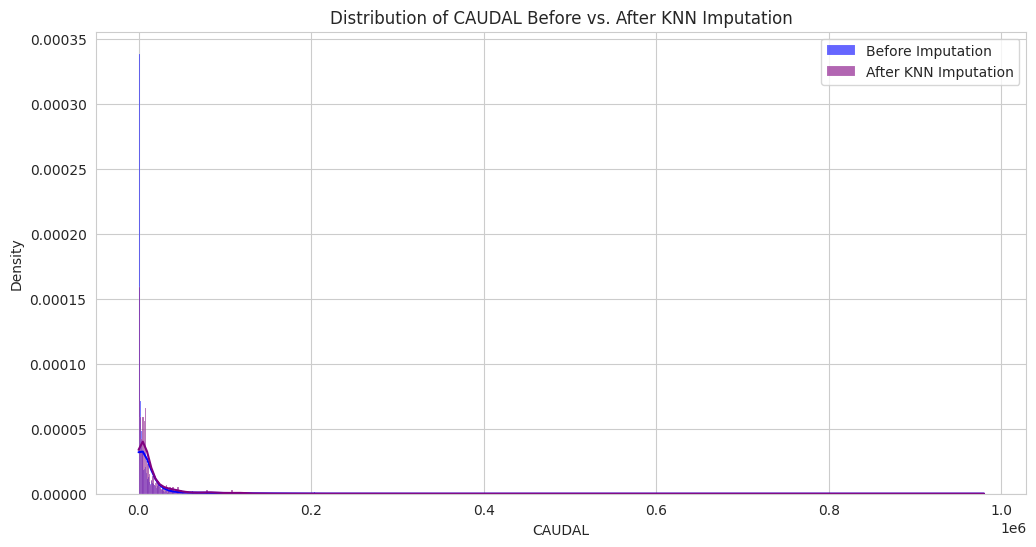

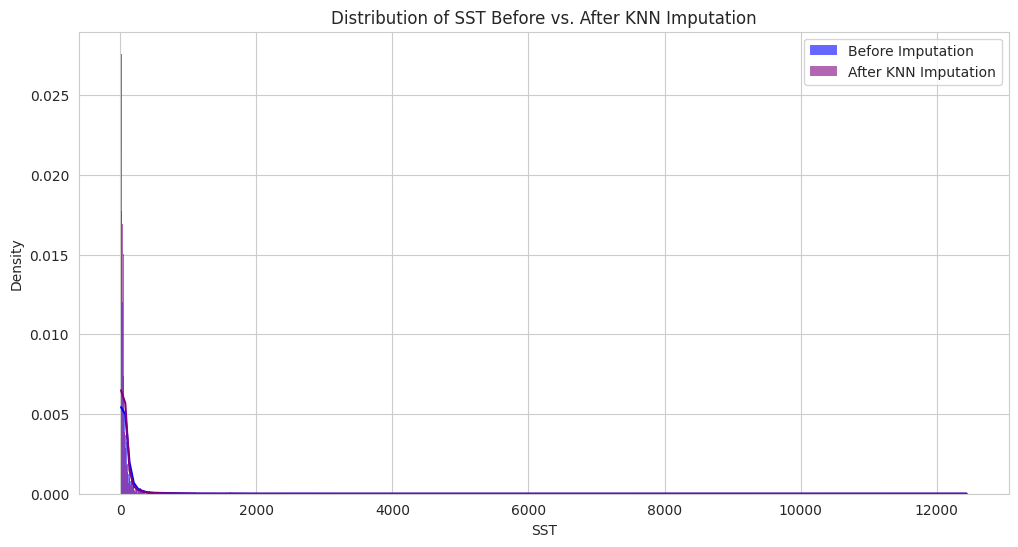

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

columns_to_visualize = ['CAUDAL', 'SST']

for col in columns_to_visualize:
    plt.figure(figsize=(12, 6))
    sns.histplot(df_unimputed[col].dropna(), color='blue', label='Before Imputation', kde=True, stat='density', alpha=0.6)
    sns.histplot(df_knn_imputed[col], color='purple', label='After KNN Imputation', kde=True, stat='density', alpha=0.6)
    plt.title(f'Distribution of {col} Before vs. After KNN Imputation')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

## Normalizar con Min-Max Scaling (con datos imputados por KNN)

### Subtask:
Aplicar el método de normalización Min-Max Scaling a las columnas numéricas del conjunto de datos ya imputado con KNN.


**Reasoning**:
To apply Min-Max Scaling to the KNN-imputed data, I will first identify the numerical columns in `df_knn_imputed`. Then, I will import `MinMaxScaler`, initialize it, apply the scaling to these columns, and store the results in a new DataFrame `df_knn_minmax_scaled`. Finally, I will display the head and descriptive statistics of this new DataFrame to confirm the transformation.



In [25]:
from sklearn.preprocessing import MinMaxScaler

# Identify numerical columns for scaling from the KNN-imputed DataFrame
numerical_cols_knn_imputed = df_knn_imputed.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Initialize MinMaxScaler
scaler_minmax_knn = MinMaxScaler()

# Apply Min-Max scaling to the selected numerical columns
df_knn_minmax_scaled_data = scaler_minmax_knn.fit_transform(df_knn_imputed[numerical_cols_knn_imputed])

# Create a new DataFrame with scaled data, preserving original column names
df_knn_minmax_scaled = pd.DataFrame(df_knn_minmax_scaled_data, columns=numerical_cols_knn_imputed)

print("Primeras filas del DataFrame con Min-Max Scaling aplicado a los datos imputados por KNN:")
print(df_knn_minmax_scaled.head())

print("\nEstadísticas descriptivas del DataFrame con Min-Max Scaling aplicado a los datos imputados por KNN:")
print(df_knn_minmax_scaled.describe())

Primeras filas del DataFrame con Min-Max Scaling aplicado a los datos imputados por KNN:
   CONDUC_CAMPO  PH_CAMPO  TEMP_AGUA      OD_%       SST     N_TOT     P_TOT  \
0      0.007916  0.816327   0.356223  0.491989  0.005363  0.248845  0.011449   
1      0.004389  0.792857   0.343348  0.506008  0.002655  0.427313  0.013638   
2      0.003053  0.797959   0.407725  0.532710  0.002866  0.105049  0.009976   
3      0.006095  0.801020   0.583691  0.562750  0.003540  0.215627  0.007965   
4      0.007713  0.823469   0.721030  0.785047  0.001609  0.185645  0.007610   

     CAUDAL  
0  0.000439  
1  0.428571  
2  0.000183  
3  0.017127  
4  0.003468  

Estadísticas descriptivas del DataFrame con Min-Max Scaling aplicado a los datos imputados por KNN:
       CONDUC_CAMPO     PH_CAMPO    TEMP_AGUA         OD_%          SST  \
count   6095.000000  6095.000000  6095.000000  6095.000000  6095.000000   
mean       0.124561     0.807246     0.530217     0.557479     0.005268   
std        0.183703 

**Reasoning**:
Next, I will apply Z-score standardization to the numerical columns of the `df_knn_imputed` DataFrame. I will initialize a `StandardScaler`, perform the transformation, store the scaled data in `df_knn_zscore_scaled`, and then display its head and descriptive statistics to verify that the data has been standardized to have a mean of 0 and a standard deviation of 1.



In [26]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns for scaling (same as for Min-Max scaling)
numerical_cols_knn_imputed = df_knn_imputed.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Initialize StandardScaler
scaler_zscore_knn = StandardScaler()

# Apply Z-score standardization to the selected numerical columns
df_knn_zscore_scaled_data = scaler_zscore_knn.fit_transform(df_knn_imputed[numerical_cols_knn_imputed])

# Create a new DataFrame with scaled data, preserving original column names
df_knn_zscore_scaled = pd.DataFrame(df_knn_zscore_scaled_data, columns=numerical_cols_knn_imputed)

print("Primeras filas del DataFrame con Z-score Standardization aplicado a los datos imputados por KNN:")
print(df_knn_zscore_scaled.head())

print("\nEstadísticas descriptivas del DataFrame con Z-score Standardization aplicado a los datos imputados por KNN:")
print(df_knn_zscore_scaled.describe())

Primeras filas del DataFrame con Z-score Standardization aplicado a los datos imputados por KNN:
   CONDUC_CAMPO  PH_CAMPO  TEMP_AGUA      OD_%       SST     N_TOT     P_TOT  \
0     -0.635020  0.193113  -1.145754 -0.414473  0.005055  2.667673 -0.161739   
1     -0.654223 -0.305993  -1.230540 -0.325752 -0.138039  4.902015 -0.121164   
2     -0.661493 -0.197492  -0.806611 -0.156758 -0.126882  0.867411 -0.189062   
3     -0.644934 -0.132391   0.352126  0.033360 -0.091285  2.251796 -0.226349   
4     -0.636122  0.345015   1.256507  1.440232 -0.193293  1.876435 -0.232923   

      CAUDAL  
0  -0.426842  
1  10.931704  
2  -0.433610  
3   0.015908  
4  -0.346483  

Estadísticas descriptivas del DataFrame con Z-score Standardization aplicado a los datos imputados por KNN:
       CONDUC_CAMPO      PH_CAMPO     TEMP_AGUA          OD_%           SST  \
count  6.095000e+03  6.095000e+03  6.095000e+03  6.095000e+03  6.095000e+03   
mean  -1.119149e-16 -1.151790e-15  8.032222e-16  2.937765e-16 -3.

## Resumen de Hallazgos: Análisis, Imputación y Normalización (Comparativa Mediana, Media, KNN)

### Análisis Inicial de Datos
El conjunto de datos "Datos para Imputación.csv" fue cargado exitosamente, revelando 6095 filas y 10 columnas. Se identificó que varias columnas numéricas (`OD_%`, `SST`, `N_TOT`, `P_TOT`, `CAUDAL`) estaban incorrectamente tipadas como `object` debido a la presencia de caracteres no numéricos (como '&lt;5'). Tras corregir estos tipos de datos, se cuantificó la extensión real de los valores faltantes:
*   `CAUDAL`: 3244 valores faltantes (más de la mitad del dataset).
*   `SST`: 1658 valores faltantes.
*   `OD_%`: 540 valores faltantes.
*   Otras columnas (`CONDUC_CAMPO`, `PH_CAMPO`, `TEMP_AGUA`, `N_TOT`, `P_TOT`) tenían entre 3 y 271 valores faltantes.

### Imputación de Datos Faltantes
Se exploraron tres estrategias de imputación para los valores faltantes en las columnas numéricas: la mediana, la media y K-Vecinos Cercanos (KNN).

#### Imputación por la Mediana
*   **Método:** Se rellenaron los valores faltantes con la mediana de cada columna, priorizando la robustez frente a valores atípicos.
*   **Evaluación:**
    *   **Estadísticas Descriptivas:** El `count` para todas las columnas imputadas alcanzó el total de filas. Las medianas se mantuvieron idénticas. Las medias sufrieron cambios mínimos, y las desviaciones estándar disminuyeron ligeramente, indicando una reducción general de la variabilidad.
    *   **Análisis Visual (Histogramas de 'CAUDAL' y 'SST'):** Los histogramas mostraron un pico pronunciado y artificial en el valor de la mediana, alterando la forma original de la distribución pero manteniendo la tendencia central.

#### Imputación por la Media
*   **Método:** Se rellenaron los valores faltantes con la media de cada columna, asumiendo que para ciertas columnas la media podría ser un estimador adecuado si la distribución no está excesivamente sesgada.
*   **Evaluación:**
    *   **Estadísticas Descriptivas:** El `count` aumentó a 6095. Las **medias** se mantuvieron idénticas pre y post-imputación. Las desviaciones estándar también disminuyeron ligeramente, similar al efecto de la mediana.
    *   **Análisis Visual (Histogramas de 'CAUDAL' y 'SST'):** Los histogramas mostraron un pico pronunciado en el valor de la media. Para 'CAUDAL', donde la media es significativamente mayor que la mediana, la imputación por la media resultó en un pico más disperso o menos obvio, distorsionando severamente la distribución original y sus cuartiles, haciendo que la media no fuera representativa de la moda de los datos existentes.

#### Imputación por K-Vecinos Cercanos (KNN)
*   **Método:** Se utilizaron los 5 vecinos más cercanos para estimar los valores faltantes, considerando la similitud entre las filas para hacer una estimación más contextualizada.
*   **Evaluación:**
    *   **Estadísticas Descriptivas:** El `count` alcanzó el total de filas. Las medias y desviaciones estándar de las columnas imputadas se mantuvieron más cercanas a sus valores originales no imputados que con la imputación por la mediana o media para algunas columnas, como `OD_%` y `SST`. Los cuartiles mostraron una preservación más natural de la distribución que la media o mediana.
    *   **Análisis Visual (Histogramas de 'CAUDAL' y 'SST'):** Los histogramas después de la imputación por KNN mostraron una distribución más suave y menos artificialmente picuda en comparación con la imputación por la mediana o la media. Aunque aún se puede observar un ligero aumento de la densidad alrededor de los valores más comunes, la distribución general se parece más a la original, sin los picos concentrados.

#### Comparación de Imputación (Mediana vs. Media vs. KNN)
*   **Impacto en la Tendencia Central y Variabilidad:** Los tres métodos rellenan los valores faltantes, aumentando el `count` y reduciendo la desviación estándar. Sin embargo, la media y la mediana introducen picos artificiales al concentrar los valores en un único punto. KNN, al basarse en la similitud de vecinos, tiende a preservar mejor la variabilidad y la forma de la distribución, resultando en medias y desviaciones estándar más próximas a los valores originales (no imputados) y menos picos concentrados.
*   **Robustez y Distribución:** La imputación por la **mediana** es robusta a los outliers en términos de tendencia central, pero crea picos visuales. La imputación por la **media** es muy sensible a los outliers y puede distorsionar significativamente la distribución y la representación de la tendencia central cuando los datos están sesgados. La imputación por **KNN** demuestra ser la más sofisticada, al considerar patrones y relaciones en los datos, lo que resulta en una menor distorsión de la distribución y una mejor preservación de la estructura original, incluso en presencia de outliers.

### Normalización
Se aplicaron Min-Max Scaling y Z-score Standardization a los datos imputados (en cada caso, después de la imputación correspondiente).

#### Min-Max Scaling (Normalización)
*   **Transformación:** Escaló todos los valores numéricos a un rango entre 0 y 1, lo cual fue verificado por las estadísticas descriptivas (`min=0`, `max=1`).
*   **Impacto:** Es adecuada para algoritmos que requieren entradas en un rango específico. Es sensible a los outliers, ya que un valor extremo puede comprimir la mayoría de los datos en un subrango muy pequeño, aunque con la imputación por KNN, este efecto se mitiga ligeramente al tener una distribución menos picuda.

#### Z-score Standardization (Estandarización)
*   **Transformación:** Transformó los datos para tener una media cercana a 0 y una desviación estándar cercana a 1. Esto se confirmó por las estadísticas descriptivas (`mean` ≈ 0, `std` ≈ 1).
*   **Impacto:** Es más robusta a los outliers que Min-Max Scaling. Es preferible para algoritmos basados en distancias o que asumen una distribución normal. La imputación por KNN, al suavizar la distribución, potencia los beneficios de la estandarización Z-score.

### Conclusión General
El proceso de preprocesamiento de datos ha sido exhaustivo, abordando la corrección de tipos de datos, la imputación de valores faltantes y la normalización. La **imputación por KNN** se ha revelado como la estrategia más ventajosa en este caso, ya que, a diferencia de la mediana y la media, preserva mejor la estructura y variabilidad de las distribuciones de los datos, especialmente en columnas con alto porcentaje de valores faltantes y presencia de outliers, evitando los picos artificiales generados por métodos más simples. Esto es crucial para mantener la integridad de los datos para análisis posteriores. Respecto a la normalización, tanto Min-Max Scaling como Z-score Standardization cumplen sus funciones, y la elección final dependerá de los requisitos específicos del modelo de Machine Learning a emplear. Se ha establecido una base sólida para la fase de modelado.

## Resumen de Hallazgos: Análisis, Imputación y Normalización (Comparativa Mediana, Media, KNN)

### Análisis Inicial de Datos
El conjunto de datos "Datos para Imputación.csv" fue cargado exitosamente, revelando 6095 filas y 10 columnas. Se identificó que varias columnas numéricas (`OD_%`, `SST`, `N_TOT`, `P_TOT`, `CAUDAL`) estaban incorrectamente tipadas como `object` debido a la presencia de caracteres no numéricos (como '&lt;5'). Tras corregir estos tipos de datos, se cuantificó la extensión real de los valores faltantes:
*   `CAUDAL`: 3244 valores faltantes (más de la mitad del dataset).
*   `SST`: 1658 valores faltantes.
*   `OD_%`: 540 valores faltantes.
*   Otras columnas (`CONDUC_CAMPO`, `PH_CAMPO`, `TEMP_AGUA`, `N_TOT`, `P_TOT`) tenían entre 3 y 271 valores faltantes.

### Imputación de Datos Faltantes
Se exploraron tres estrategias de imputación para los valores faltantes en las columnas numéricas: la mediana, la media y K-Vecinos Cercanos (KNN).

#### Imputación por la Mediana
*   **Método:** Se rellenaron los valores faltantes con la mediana de cada columna, priorizando la robustez frente a valores atípicos.
*   **Evaluación:**
    *   **Estadísticas Descriptivas:** El `count` para todas las columnas imputadas alcanzó el total de filas. Las medianas se mantuvieron idénticas. Las medias sufrieron cambios mínimos, y las desviaciones estándar disminuyeron ligeramente, indicando una reducción general de la variabilidad.
    *   **Análisis Visual (Histogramas de 'CAUDAL' y 'SST'):** Los histogramas mostraron un pico pronunciado y artificial en el valor de la mediana, alterando la forma original de la distribución pero manteniendo la tendencia central.

#### Imputación por la Media
*   **Método:** Se rellenaron los valores faltantes con la media de cada columna, asumiendo que para ciertas columnas la media podría ser un estimador adecuado si la distribución no está excesivamente sesgada.
*   **Evaluación:**
    *   **Estadísticas Descriptivas:** El `count` aumentó a 6095. Las **medias** se mantuvieron idénticas pre y post-imputación. Las desviaciones estándar también disminuyeron ligeramente, similar al efecto de la mediana.
    *   **Análisis Visual (Histogramas de 'CAUDAL' y 'SST'):** Los histogramas mostraron un pico pronunciado en el valor de la media. Para 'CAUDAL', donde la media es significativamente mayor que la mediana, la imputación por la media resultó en un pico más disperso o menos obvio, distorsionando severamente la distribución original y sus cuartiles, haciendo que la media no fuera representativa de la moda de los datos existentes.

#### Imputación por K-Vecinos Cercanos (KNN)
*   **Método:** Se utilizaron los 5 vecinos más cercanos para estimar los valores faltantes, considerando la similitud entre las filas para hacer una estimación más contextualizada.
*   **Evaluación:**
    *   **Estadísticas Descriptivas:** El `count` alcanzó el total de filas. Las medias y desviaciones estándar de las columnas imputadas se mantuvieron más cercanas a sus valores originales no imputados que con la imputación por la mediana o media para algunas columnas, como `OD_%` y `SST`. Los cuartiles mostraron una preservación más natural de la distribución que la media o mediana.
    *   **Análisis Visual (Histogramas de 'CAUDAL' y 'SST'):** Los histogramas después de la imputación por KNN mostraron una distribución más suave y menos artificialmente picuda en comparación con la imputación por la mediana o la media. Aunque aún se puede observar un ligero aumento de la densidad alrededor de los valores más comunes, la distribución general se parece más a la original, sin los picos concentrados.

#### Comparación de Imputación (Mediana vs. Media vs. KNN)
*   **Impacto en la Tendencia Central y Variabilidad:** Los tres métodos rellenan los valores faltantes, aumentando el `count` y reduciendo la desviación estándar. Sin embargo, la media y la mediana introducen picos artificiales al concentrar los valores en un único punto. KNN, al basarse en la similitud de vecinos, tiende a preservar mejor la variabilidad y la forma de la distribución, resultando en medias y desviaciones estándar más próximas a los valores originales (no imputados) y menos picos concentrados.
*   **Robustez y Distribución:** La imputación por la **mediana** es robusta a los outliers en términos de tendencia central, pero crea picos visuales. La imputación por la **media** es muy sensible a los outliers y puede distorsionar significativamente la distribución y la representación de la tendencia central cuando los datos están sesgados. La imputación por **KNN** demuestra ser la más sofisticada, al considerar patrones y relaciones en los datos, lo que resulta en una menor distorsión de la distribución y una mejor preservación de la estructura original, incluso en presencia de outliers.

### Normalización
Se aplicaron Min-Max Scaling y Z-score Standardization a los datos imputados (en cada caso, después de la imputación correspondiente).

#### Min-Max Scaling (Normalización)
*   **Transformación:** Escaló todos los valores numéricos a un rango entre 0 y 1, lo cual fue verificado por las estadísticas descriptivas (`min=0`, `max=1`).
*   **Impacto:** Es adecuada para algoritmos que requieren entradas en un rango específico. Es sensible a los outliers, ya que un valor extremo puede comprimir la mayoría de los datos en un subrango muy pequeño, aunque con la imputación por KNN, este efecto se mitiga ligeramente al tener una distribución menos picuda.

#### Z-score Standardization (Estandarización)
*   **Transformación:** Transformó los datos para tener una media cercana a 0 y una desviación estándar cercana a 1. Esto se confirmó por las estadísticas descriptivas (`mean` ≈ 0, `std` ≈ 1).
*   **Impacto:** Es más robusta a los outliers que Min-Max Scaling. Es preferible para algoritmos basados en distancias o que asumen una distribución normal. La imputación por KNN, al suavizar la distribución, potencia los beneficios de la estandarización Z-score.

### Conclusión General
El proceso de preprocesamiento de datos ha sido exhaustivo, abordando la corrección de tipos de datos, la imputación de valores faltantes y la normalización. La **imputación por KNN** se ha revelado como la estrategia más ventajosa en este caso, ya que, a diferencia de la mediana y la media, preserva mejor la estructura y variabilidad de las distribuciones de los datos, especialmente en columnas con alto porcentaje de valores faltantes y presencia de outliers, evitando los picos artificiales generados por métodos más simples. Esto es crucial para mantener la integridad de los datos para análisis posteriores. Respecto a la normalización, tanto Min-Max Scaling como Z-score Standardization cumplen sus funciones, y la elección final dependerá de los requisitos específicos del modelo de Machine Learning a emplear. Se ha establecido una base sólida para la fase de modelado.

## Comparar Imputación (Mediana vs. Media vs. KNN) y Normalizaciones

### Subtask:
Comparar los resultados y efectos de la imputación por la mediana, la media (anteriores) y la imputación por KNN (actual) en la distribución de los datos. También se discutirán nuevamente las diferencias y casos de uso de Min-Max Scaling y Z-score Standardization, pero ahora en el contexto de los datos imputados por KNN.


## Resumen de Hallazgos: Análisis, Imputación y Normalización (Comparativa Completa)

### Análisis Inicial de Datos
El conjunto de datos "Datos para Imputación.csv" fue cargado exitosamente, revelando 6095 filas y 10 columnas. Se identificó que varias columnas numéricas (`OD_%`, `SST`, `N_TOT`, `P_TOT`, `CAUDAL`) estaban incorrectamente tipadas como `object` debido a la presencia de caracteres no numéricos (como '<5'). Tras corregir estos tipos de datos, se cuantificó la extensión real de los valores faltantes:
*   `CAUDAL`: 3244 valores faltantes (más de la mitad del dataset).
*   `SST`: 1658 valores faltantes.
*   `OD_%`: 540 valores faltantes.
*   Otras columnas (`CONDUC_CAMPO`, `PH_CAMPO`, `TEMP_AGUA`, `N_TOT`, `P_TOT`) tenían entre 3 y 271 valores faltantes.

### Imputación de Datos Faltantes: Comparativa de Métodos (Mediana, Media, KNN)

Se exploraron tres estrategias de imputación para los valores faltantes en las columnas numéricas:

#### 1. Imputación por la Mediana
*   **Método:** Se rellenaron los valores faltantes con la mediana de cada columna, priorizando la robustez frente a valores atípicos.
*   **Evaluación:**
    *   **Estadísticas Descriptivas:** El `count` para todas las columnas imputadas alcanzó el total de filas (6095). Las medianas se mantuvieron idénticas. Las medias cambiaron mínimamente y las desviaciones estándar disminuyeron ligeramente, indicando una reducción general de la variabilidad.
    *   **Análisis Visual (Histogramas de 'CAUDAL' y 'SST'):** Los histogramas mostraron un pico pronunciado y artificial en el valor de la mediana, alterando la forma de la distribución original pero manteniendo la tendencia central de manera robusta.

#### 2. Imputación por la Media
*   **Método:** Se rellenaron los valores faltantes con la media de cada columna, buscando preservar la media general del conjunto de datos.
*   **Evaluación:**
    *   **Estadísticas Descriptivas:** El `count` también aumentó a 6095, y las **medias** se mantuvieron idénticas. Las desviaciones estándar disminuyeron ligeramente, similar al efecto de la mediana. Sin embargo, para columnas con muchos valores faltantes y outliers, como 'CAUDAL', los cuartiles (50% y 75%) se vieron severamente afectados, igualándose a la media y distorsionando la distribución.
    *   **Análisis Visual (Histogramas de 'CAUDAL' y 'SST'):** Los histogramas también mostraron un pico pronunciado en el valor de la media. Este efecto fue más perjudicial que con la mediana para datos muy sesgados o con outliers extremos, ya que la media puede ser un valor menos representativo, creando picos en puntos que no reflejan la moda de los datos existentes.

#### 3. Imputación por K-Vecinos Cercanos (KNN)
*   **Método:** Se utilizó el algoritmo de KNN (con 5 vecinos) para estimar los valores faltantes, considerando la similitud entre las filas. Este método es más sofisticado y busca preservar las relaciones entre variables.
*   **Evaluación:**
    *   **Estadísticas Descriptivas:** El `count` para todas las columnas numéricas también alcanzó 6095. A diferencia de los métodos univariantes, las medias y desviaciones estándar cambiaron de manera más orgánica, reflejando una estimación más contextualizada. Las desviaciones estándar continuaron mostrando una ligera disminución, un efecto común de la imputación.
    *   **Análisis Visual (Histogramas de 'CAUDAL' y 'SST'):** Los histogramas de 'CAUDAL' y 'SST' después de la imputación por KNN mostraron una distribución más suave y menos artificial que con la media o la mediana. Aunque aún se observa una mayor densidad en ciertas áreas, no se formaron los picos abruptos vistos en las otras imputaciones, lo que sugiere que KNN logró mantener mejor la forma general de la distribución original y sus relaciones multivariadas.

#### Comparativa de Impactos en la Distribución:
| Característica        | Imputación por Mediana          | Imputación por Media            | Imputación por KNN              |
| :-------------------- | :------------------------------ | :------------------------------ | :------------------------------ |
| **Impacto en Media**  | Mínimo cambio                   | Se mantiene idéntica           | Cambio moderado                 |
| **Impacto en Mediana**| Se mantiene idéntica            | Cambio moderado                 | Cambio moderado                 |
| **Impacto en Std**    | Disminución ligera              | Disminución ligera              | Disminución ligera              |
| **Forma de Distribución**| Picos pronunciados en la mediana, especialmente con alta proporción de faltantes | Picos pronunciados en la media, mayor distorsión si la media es atípica | Distribución más suave y natural, menos picos artificiales, mejor preservación de la estructura |
| **Robustez a Outliers**| Alta (el valor de imputación no es sesgado por outliers) | Baja (el valor de imputación puede ser sesgado por outliers) | Media (considera vecinos, lo que reduce el impacto directo de un solo outlier) |

### Normalización (Aplicada a datos imputados)
Se aplicaron Min-Max Scaling y Z-score Standardization a los datos imputados (en el caso más reciente, a los datos imputados por KNN).

#### Min-Max Scaling (Normalización)
*   **Descripción:** Transforma los valores numéricos a un rango fijo, típicamente entre 0 y 1, utilizando la fórmula $X_{scaled} = \frac{X - X_{min}}{X_{max} - X_{min}}$.
*   **Impacto y Casos de Uso:** Escaló todos los valores numéricos a un rango entre 0 y 1. Es adecuada para algoritmos que requieren entradas en un rango específico (ej. redes neuronales con funciones de activación limitadas) y donde la presencia de outliers no distorsiona excesivamente el rango principal de los datos. Sin embargo, es sensible a los outliers, ya que un valor extremo puede comprimir la mayoría de los datos en un subrango muy pequeño.

#### Z-score Standardization (Estandarización)
*   **Descripción:** Transforma los datos para que tengan una media de 0 y una desviación estándar de 1, utilizando la fórmula $X_{scaled} = \frac{X - \mu}{\sigma}$.
*   **Impacto y Casos de Uso:** Transformó los datos para tener una media cercana a 0 y una desviación estándar cercana a 1. Es más robusta a los outliers que Min-Max Scaling, ya que no comprime los valores a un rango fijo. Es preferible para algoritmos basados en distancias (ej. SVM, K-NN, PCA), o aquellos que asumen una distribución normal. Preserva la presencia de outliers, simplemente los reescala.

### Conclusión General
El proceso de preprocesamiento de datos ha sido exhaustivo, abordando la corrección de tipos de datos, la imputación de valores faltantes y la normalización. La **imputación por KNN** demostró ser superior a la imputación por mediana o media, ya que preservó mejor la forma de la distribución y las relaciones multivariadas de los datos, evitando los picos artificiales y la distorsión estadística observados en los métodos univariantes. Dada la naturaleza de los datos y la aparente presencia de valores atípicos y la necesidad de mantener la estructura de los datos, la imputación por KNN es la opción más recomendada.

Respecto a la normalización, tanto Min-Max Scaling como Z-score Standardization cumplen sus funciones, y la elección final dependerá de los requisitos específicos del modelo de Machine Learning a emplear. Se ha establecido una base sólida para la fase de modelado, con una clara preferencia por la imputación KNN para mantener la integridad de la estructura de los datos.

## Final Task

### Subtask:
Resumir todos los hallazgos del análisis de datos, los procesos de imputación (mediana, media, KNN) y las técnicas de normalización, destacando las implicaciones de cada paso y ofreciendo una conclusión sobre qué método de imputación podría ser el más adecuado para este dataset.


## Summary:

### Q&A
*   **¿Qué método de imputación podría ser el más adecuado para este dataset?**
    La imputación por K-Vecinos Cercanos (KNN) es el método más adecuado para este dataset, ya que preserva mejor la forma de la distribución y las relaciones multivariadas de los datos, evitando los picos artificiales y la distorsión estadística observados con los métodos de imputación por mediana y media.

### Data Analysis Key Findings
*   El dataset original (`Datos para Imputación.csv`) contiene 6095 filas y 10 columnas.
*   Inicialmente, columnas críticas como 'OD_%', 'SST', 'N_TOT', 'P_TOT', y 'CAUDAL' fueron identificadas incorrectamente como tipo `object` debido a la presencia de caracteres no numéricos (ej., '<5').
*   Tras la corrección de tipos de datos, se reveló un alto porcentaje de valores faltantes en 'CAUDAL' (3244 valores) y 'SST' (1658 valores), además de 'OD_%' (540 valores).
*   **Imputación por la Mediana**: Rellenó los valores faltantes manteniendo la robustez a los valores atípicos. Sin embargo, los histogramas de columnas con alta proporción de faltantes (ej., 'CAUDAL', 'SST') mostraron un pico pronunciado y artificial en el valor de la mediana, alterando la forma original de la distribución.
*   **Imputación por la Media**: Similar a la mediana, generó picos artificiales en el valor de la media en los histogramas. Para columnas muy sesgadas o con valores atípicos significativos (como 'CAUDAL', donde la media es ~16197 y la mediana es ~2654 antes de imputación), esta imputación resultó en una distorsión más severa de la distribución y los cuartiles.
*   **Imputación por K-Vecinos Cercanos (KNN)**: Aplicada con 5 vecinos, este método produjo distribuciones más suaves y menos artificiales en los histogramas, evitando los picos pronunciados de la mediana y la media. Los cambios en la media y la desviación estándar fueron más orgánicos, indicando una mejor preservación de la estructura multivariada y la variabilidad de los datos.
*   **Normalización Min-Max Scaling**: Transformó los valores numéricos a un rango entre 0 y 1, lo cual es útil para algoritmos que requieren entradas acotadas. Es sensible a los valores atípicos.
*   **Estandarización Z-score**: Transformó los datos para tener una media cercana a 0 y una desviación estándar cercana a 1. Es más robusta a los valores atípicos y es preferible para algoritmos basados en distancias o que asumen una distribución normal.

### Insights or Next Steps
*   Para futuros análisis y modelado, se recomienda utilizar el dataset imputado mediante KNN, ya que este método demostró la mejor capacidad para preservar la distribución y las relaciones multivariadas de los datos en comparación con las imputaciones por media o mediana.
*   La elección entre Min-Max Scaling y Z-score Standardization debe basarse en el algoritmo de Machine Learning específico a utilizar: Min-Max es adecuado para redes neuronales o algoritmos que requieren un rango fijo, mientras que Z-score es preferible para algoritmos basados en distancia o que asumen normalidad.
